 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 04 : Neural Networks </b>


This programming assignment gives you a chance to perform the classification task using neural networks. You will get to build a neural network from scratch and train and test it on a standard classification dataset. Further you will learn different tricks and techniques to train a neural network eficiently by observing few important issues and trying to overcome them. This includes observing the performance of the network for different activation functions and optimization algorithms. We will conclude with implementation of various regularization techniques to overcome the problems of overfitting and vanishing gradients.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








<b>  Part - (1) : Develop a neural network based classification network from scratch: </b>  This programming assignment uses MNIST digit dataset. It consists of large collection of handwritten digits from 0 to 9. These images are formated as 28x28 pixel gray scale images. The objective of this programming assignment is to design a neural network architecture that takes input as 28x28 image (or 784 dimensional vector) as input and predicts the digit information in it. Although there are diffrent varieties of neural network architecture to solve this task, this programming assignment uses only the feed forward network.  

<dt> <h6> 1. Load MNIST data and create train, test splits </dt> </h6>

<dd> <h6> - The MNIST dataset consists of around 70,000 images. Divide the dataset into two segments: training and testing. Allocate 60,000 images for training and 10,000 images for testing
</dd> </h6>
<dd> <h6> - Code for downloading the data and creating train-test splits is provided </dd> </h6>

<dt> <h6> 2. Design a simple classification network </dt> </h6>

<dd> <h6> - Let us use three layer feed-forward neral network. Use 512 nodes in the hidden layers and 10 nodes in the output layer. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dd> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dd> </h6>
<dd> <h6> where $\textbf{W}_{1} \in \mathcal{R}^{512 \times 768}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{10 \times 512} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dd> </h6>
<dd> <h6> - Consider g(.) as ReLU activation function. Softmax activation function should be used at the last layer h(.), to get the posterior probability of the classes. </dd> </h6>

<dt> <h6> - Training classification network: </dt> </h6>

<dd> <h6>  - Flatten the 28x28 images to arrive at 784 dimensional vector.  </dd> </h6>  
<dd> <h6> - Randomly initialize the parameters of network, $\textbf{W}_{1} \in \mathcal{R}^{768 \times 512}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{512 \times 10}$  </dd> </h6>
<dd> <h6> - Feedforward the batch of input vectors to get the posterior probability of classes.  </dd> </h6>
<dd> <h6> - Compute the loss between the estimated posterior probabilities and the true targets. </dd> </h6>  
<dd> <h6> - Update the parameters of network to minimize the loss function.  </dd> </h6>
<dd> <h6> <dd> <h6> - Backpropagate the loss function to get the gradients.  </dd> </h6> </dd> </h6>  

<dd> <h6> <dd> <h6> - You can use stochastic gradient descent (SGD) optimization algorithm to update the parameters.  </dd> </h6> </dd> </h6>  
<dd> <h6> <dd> <h6> - Cleverly set the hyperparameters involved in this optimization process. </dd> </h6> </dd> </h6>

<dt> <h6> 3. Evaluate the performance of classification network </dd> </h6>
<dd> <h6> - feed-forward the MNIST data through the trained classification network to get class posteriors. </dd> </h6>  
<dd> <h6> - Assign the input to the class having maximum posterior probability </dd> </h6>  
<dd> <h6> - Compute the loss and accuaracy </dd> </h6>  
<dd> <h6> - Report your observations </dd> </h6>  





In [1]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

In [13]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print("Flattened Testing data", x_test)
print("Testing labels", y_test)

2025-04-30 22:13:48.404145: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-30 22:13:48.410052: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-30 22:13:48.449041: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-30 22:13:48.477857: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746031428.507450    8369 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746031428.51

Flattened Testing data [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Testing labels [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
##################################################
#Load MNIST data.
##################################################
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

#Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()
print("Training data",mnist_traindata.shape)
print("Training labels",mnist_trainlabel.shape)

#Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data",mnist_testdata.shape)
print("Testing labels",mnist_testlabel.shape)

Training data (60000, 28, 28)
Training labels (60000,)
Testing data (10000, 28, 28)
Testing labels (10000,)


In [15]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

print(mnist_traindata.shape,mnist_trainlabel.shape)
print(mnist_testdata.shape,mnist_testlabel.shape)

#print(mnist_traindata[0]/255.0)
#print(x_train[0])

a=mnist_traindata[0]/255.0
a=a.reshape(-1,28*28)
b=x_train[0]
print(a.shape)
print(b.shape)
print(a==b)


(60000, 784) (60000, 10)
(10000, 784) (10000, 10)
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(1, 784)
(784,)
[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  T

Training data (60000, 28, 28)
Training labels (60000,)
Testing data (10000, 28, 28)
Testing labels (10000,)
Epoch 1/20 - Train Loss: 0.5375, Train Acc: 0.8705, Val Loss: 0.5353, Val Acc: 0.8698
Model improved! Saving weights with validation accuracy: 0.8698
Epoch 2/20 - Train Loss: 0.3841, Train Acc: 0.8981, Val Loss: 0.3871, Val Acc: 0.8922
Model improved! Saving weights with validation accuracy: 0.8922
Epoch 3/20 - Train Loss: 0.3290, Train Acc: 0.9097, Val Loss: 0.3350, Val Acc: 0.9050
Model improved! Saving weights with validation accuracy: 0.9050
Epoch 4/20 - Train Loss: 0.2990, Train Acc: 0.9176, Val Loss: 0.3080, Val Acc: 0.9124
Model improved! Saving weights with validation accuracy: 0.9124
Epoch 5/20 - Train Loss: 0.2776, Train Acc: 0.9221, Val Loss: 0.2871, Val Acc: 0.9163
Model improved! Saving weights with validation accuracy: 0.9163
Epoch 6/20 - Train Loss: 0.2586, Train Acc: 0.9283, Val Loss: 0.2695, Val Acc: 0.9235
Model improved! Saving weights with validation accuracy:

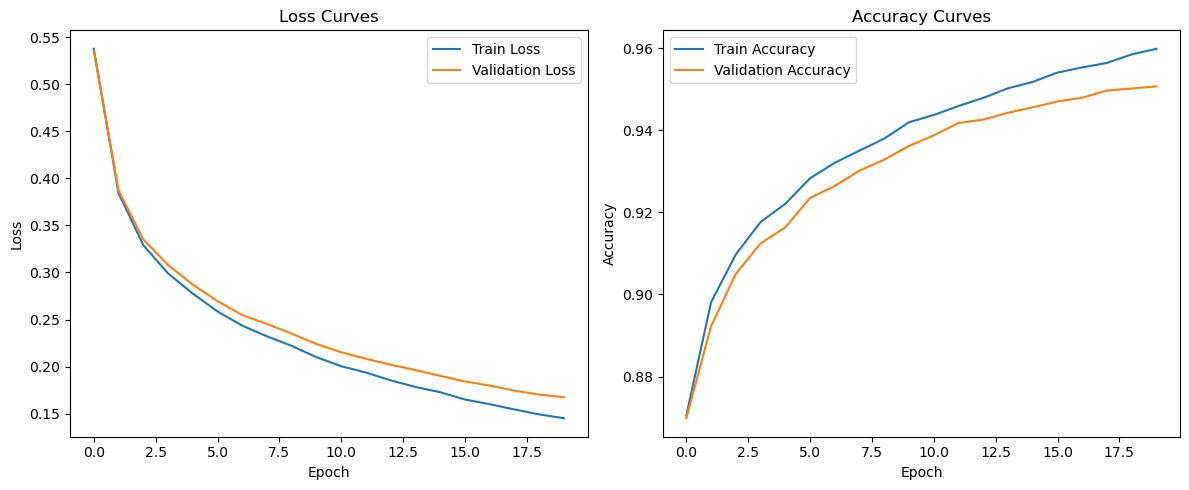

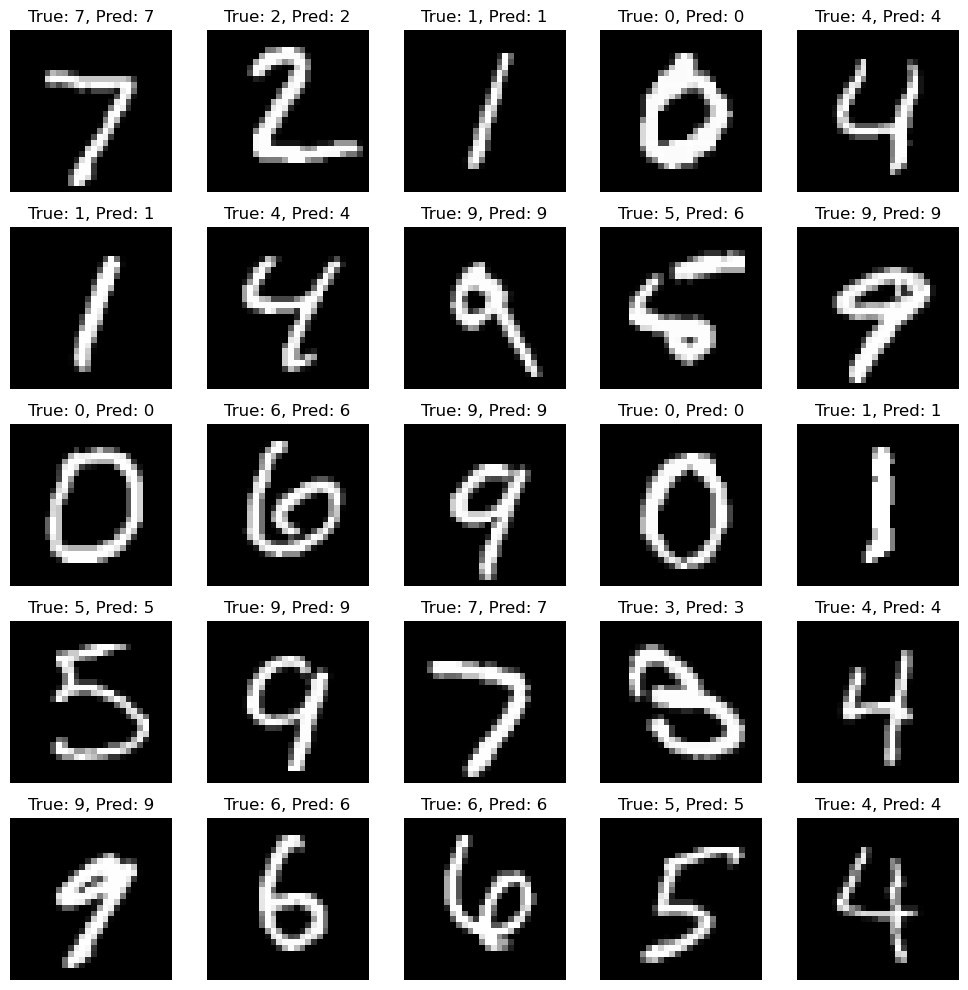

In [16]:
##################################################
#Load MNIST data.
##################################################
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

#Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()
print("Training data",mnist_traindata.shape)
print("Training labels",mnist_trainlabel.shape)

#Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data",mnist_testdata.shape)
print("Testing labels",mnist_testlabel.shape)

##################################################
#Define the architecture
##################################################

#Complete the below function to implement ReLU activation function
def ReLu(inp):
    outp = np.maximum(0, inp)
    return outp

#Complete the below function to implement gradient of ReLU activation function
def gradReLu(inp):
    outp = (inp > 0).astype(float)
    return outp

#Complete the below function to implement softmax activation function
def softmax(inp):
    # Subtract max for numerical stability
    exp_scores = np.exp(inp - np.max(inp, axis=1, keepdims=True))
    outp = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return outp

#Complete the below function to implement forward propagation of data
def fwdPropagate(inputs, weights):
    #Inputs: input data, parameters of network
    W1, W2, W3 = weights
    
    # First layer computation
    z1 = np.dot(inputs, W1)
    a1 = ReLu(z1)
    
    # Second layer computation
    z2 = np.dot(a1, W2)
    a2 = ReLu(z2)
    
    # Output layer computation
    z3 = np.dot(a2, W3)
    a3 = softmax(z3)
    
    # Return the required outputs, i.e., final output and intermediate activations
    outps = {'a1': a1, 'z1': z1, 'a2': a2, 'z2': z2, 'a3': a3, 'z3': z3}
    return outps

#Complete the below function to compute the gradients
def computeGradients(inputs, targets, weights, activations):
    #Inputs: input data, targets, parameters of network, intermediate activations
    W1, W2, W3 = weights
    a1, z1, a2, z2, a3, z3 = activations['a1'], activations['z1'], activations['a2'], activations['z2'], activations['a3'], activations['z3']
    m = inputs.shape[0]  # batch size
    
    #Compute the loss
    # Cross entropy loss
    loss = -np.sum(targets * np.log(a3 + 1e-8)) / m
    
    #Compute the derivative of loss at parameters
    # Backpropagation
    dz3 = a3 - targets  # derivative of softmax with cross-entropy
    dw3 = np.dot(a2.T, dz3) / m
    
    dz2 = np.dot(dz3, W3.T) * gradReLu(z2)
    dw2 = np.dot(a1.T, dz2) / m
    
    dz1 = np.dot(dz2, W2.T) * gradReLu(z1)
    dw1 = np.dot(inputs.T, dz1) / m
    
    #Return the gradients
    return [dw1, dw2, dw3]

#Complete the below function to update the parameters using the above computed gradients
def applyGradients(weights, gradients, learning_rate):
    #Inputs: weights, gradients, and learning rate
    W1, W2, W3 = weights
    dw1, dw2, dw3 = gradients
    
    # Update weights using gradient descent
    W1 = W1 - learning_rate * dw1
    W2 = W2 - learning_rate * dw2
    W3 = W3 - learning_rate * dw3
    
    #Return the updated parameters
    return [W1, W2, W3]

#Complete the below function to complete the backpropagation step
def backPropagate(inputs, targets, weights, activations, learning_rate):
    #Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm
    
    #Compute the gradients
    gradients = computeGradients(inputs, targets, weights, activations)
    
    #Update the parameters using gradients
    updated_weights = applyGradients(weights, gradients, learning_rate)
    
    #Return the updated parameters
    return updated_weights

##################################################
#Train the network
##################################################

#Complete the below function to complete the training of network
def training(inputs, targets_idx, batch_size=128, epochs=30, train_val_split=0.8, learning_rate=0.001):
    
    #Set the hyperparameters
    input_size = 784  # 28x28 flattened
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = int(np.ceil(n_samples * train_val_split / batch_size))
    
    #Split the training data into two parts.
    #Use 90 percent of training data for training the network.
    #Remaining 10 percent as validation data
    split_idx = int(n_samples * train_val_split)
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    train_idx = indices[:split_idx]
    val_idx = indices[split_idx:]
    
    X_train = inputs[train_idx] / 255.0  # Normalize pixel values
    y_train = targets_idx[train_idx]
    
    X_val = inputs[val_idx] / 255.0
    y_val = targets_idx[val_idx]
    
    # Convert labels to one-hot encoding
    y_train_onehot = np.zeros((y_train.size, n_classes))
    y_train_onehot[np.arange(y_train.size), y_train] = 1
    
    y_val_onehot = np.zeros((y_val.size, n_classes))
    y_val_onehot[np.arange(y_val.size), y_val] = 1
    
    #Randomly initialize the weights
    np.random.seed(42)
    # He initialization for better convergence with ReLU
    W1 = np.random.randn(input_size, hidden_units) * np.sqrt(2/input_size)
    W2 = np.random.randn(hidden_units, hidden_units) * np.sqrt(2/hidden_units)
    W3 = np.random.randn(hidden_units, n_classes) * np.sqrt(2/hidden_units)
    
    weights = [W1, W2, W3]
    best_weights = weights.copy()
    best_val_acc = 0
    
    # Training statistics
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []
    
    #Iterate for epochs times
    for epoch in range(epochs):
        #Shuffle the training data
        shuffle_idx = np.random.permutation(len(X_train))
        X_train_shuffled = X_train[shuffle_idx]
        y_train_onehot_shuffled = y_train_onehot[shuffle_idx]
        
        epoch_loss = 0
        
        #Iterate through the batches of data
        for batch in range(n_batches):
            #Get the batch of data
            start_idx = batch * batch_size
            end_idx = min(start_idx + batch_size, len(X_train_shuffled))
            
            X_batch = X_train_shuffled[start_idx:end_idx]
            y_batch = y_train_onehot_shuffled[start_idx:end_idx]
            
            #Forward propagation
            activations = fwdPropagate(X_batch, weights)
            
            # Calculate batch loss
            batch_loss = -np.sum(y_batch * np.log(activations['a3'] + 1e-8)) / len(X_batch)
            epoch_loss += batch_loss
            
            #Backward propagation
            weights = backPropagate(X_batch, y_batch, weights, activations, learning_rate)
        
        epoch_loss /= n_batches
        
        #Compute outputs on training data
        train_activations = fwdPropagate(X_train, weights)
        train_predictions = np.argmax(train_activations['a3'], axis=1)
        
        #Compute training accuracy, and training error
        train_loss = -np.sum(y_train_onehot * np.log(train_activations['a3'] + 1e-8)) / len(X_train)
        train_accuracy = np.mean(train_predictions == y_train)
        
        #Compute outputs on validation data
        val_activations = fwdPropagate(X_val, weights)
        val_predictions = np.argmax(val_activations['a3'], axis=1)
        
        #Compute validation accuracy, and validation error
        val_loss = -np.sum(y_val_onehot * np.log(val_activations['a3'] + 1e-8)) / len(X_val)
        val_accuracy = np.mean(val_predictions == y_val)
        
        # Save statistics
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)
        
        #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")
        
        #Save the parameters of network
        if val_accuracy > best_val_acc:
            best_val_acc = val_accuracy
            best_weights = weights.copy()
            print(f"Model improved! Saving weights with validation accuracy: {val_accuracy:.4f}")
    
    # Return the best weights and training statistics
    return best_weights, train_losses, train_accuracies, val_losses, val_accuracies

#Call the training function to train the network
# Reshape and normalize the data
mnist_traindata_flat = mnist_traindata.reshape(mnist_traindata.shape[0], -1)
best_weights, train_losses, train_accuracies, val_losses, val_accuracies = training(
    mnist_traindata_flat, mnist_trainlabel, batch_size=128, epochs=20, learning_rate=0.01
)

##################################################
#Evaluate the performance on test data
##################################################
# Prepare test data
X_test = mnist_testdata.reshape(mnist_testdata.shape[0], -1) / 255.0
y_test_onehot = np.zeros((mnist_testlabel.size, 10))
y_test_onehot[np.arange(mnist_testlabel.size), mnist_testlabel] = 1

# Forward pass
test_activations = fwdPropagate(X_test, best_weights)
test_predictions = np.argmax(test_activations['a3'], axis=1)

# Calculate loss and accuracy
test_loss = -np.sum(y_test_onehot * np.log(test_activations['a3'] + 1e-8)) / len(X_test)
test_accuracy = np.mean(test_predictions == mnist_testlabel)

print("="*50)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plot training curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')
plt.legend()
plt.tight_layout()
plt.show()

# Visualize some predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(mnist_testdata[i], cmap='gray')
    plt.title(f"True: {mnist_testlabel[i]}, Pred: {test_predictions[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

<b> Report your observations </b>

1. The model improved on every epoch.

2. Accuracy of 95 percent signifies it has worked nearly ideally.

3. ReLU function is a good activation function



<b> Part - (2) : Understanding activation functions: </b> In this part you will learn to use different activation functions for the classification task and compare their performances.

<dt> <h6> 1. Train MNIST digit classification network with different activation functions i.e. Sigmoid, Tanh, ReLU, LeakyReLU etc. You can stick to stochastic gradient descent optimization algorithm for this part </dt> </h6>
<dt> <h6> 2. Report the accuray on MNIST test data for all the experiments. Write down your observations in the report.</br> </dt> </h6>




Training with relu activation function:
Epoch 1/20 - Train Loss: 0.6322, Train Acc: 0.8507, Val Loss: 0.6426, Val Acc: 0.8463
Model improved! Saving weights with validation accuracy: 0.8463
Epoch 2/20 - Train Loss: 0.4288, Train Acc: 0.8839, Val Loss: 0.4413, Val Acc: 0.8818
Model improved! Saving weights with validation accuracy: 0.8818
Epoch 3/20 - Train Loss: 0.3613, Train Acc: 0.8988, Val Loss: 0.3752, Val Acc: 0.8942
Model improved! Saving weights with validation accuracy: 0.8942
Epoch 4/20 - Train Loss: 0.3267, Train Acc: 0.9066, Val Loss: 0.3414, Val Acc: 0.9040
Model improved! Saving weights with validation accuracy: 0.9040
Epoch 5/20 - Train Loss: 0.3015, Train Acc: 0.9136, Val Loss: 0.3183, Val Acc: 0.9107
Model improved! Saving weights with validation accuracy: 0.9107
Epoch 6/20 - Train Loss: 0.2828, Train Acc: 0.9185, Val Loss: 0.3002, Val Acc: 0.9151
Model improved! Saving weights with validation accuracy: 0.9151
Epoch 7/20 - Train Loss: 0.2673, Train Acc: 0.9228, Val Los

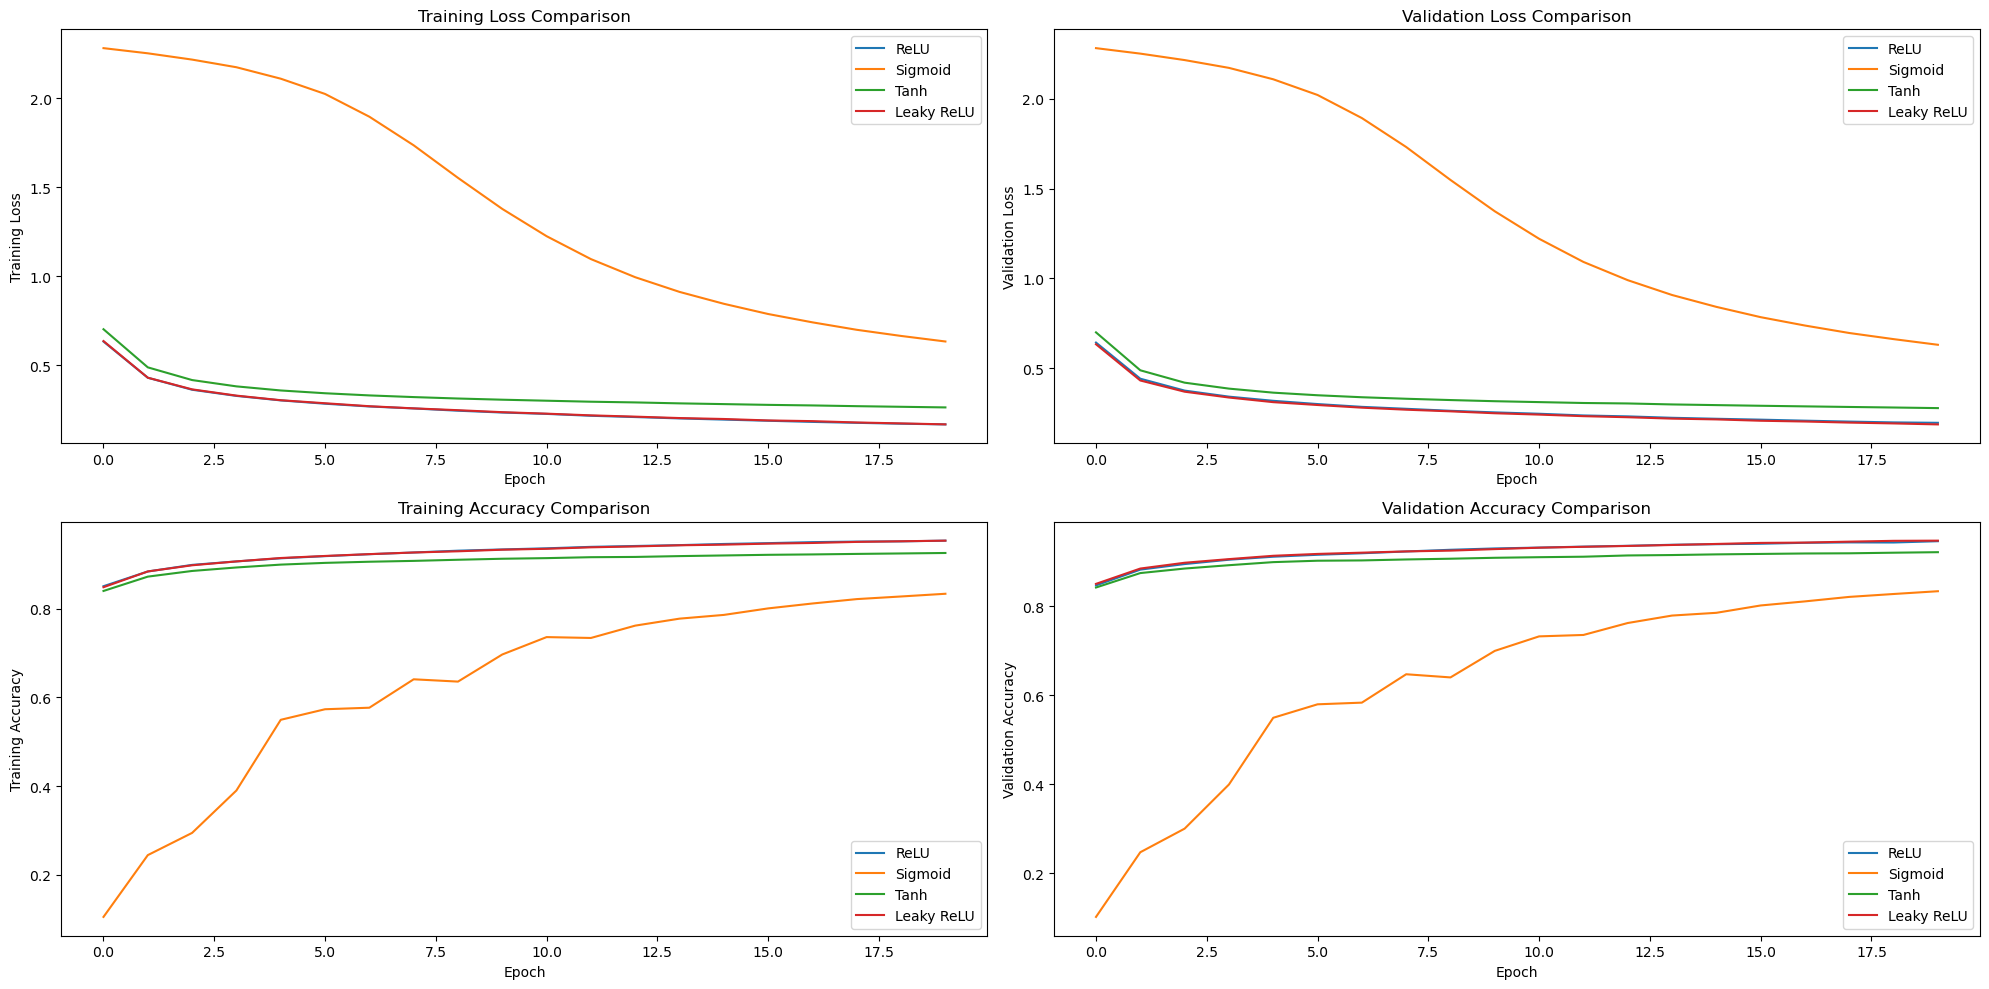

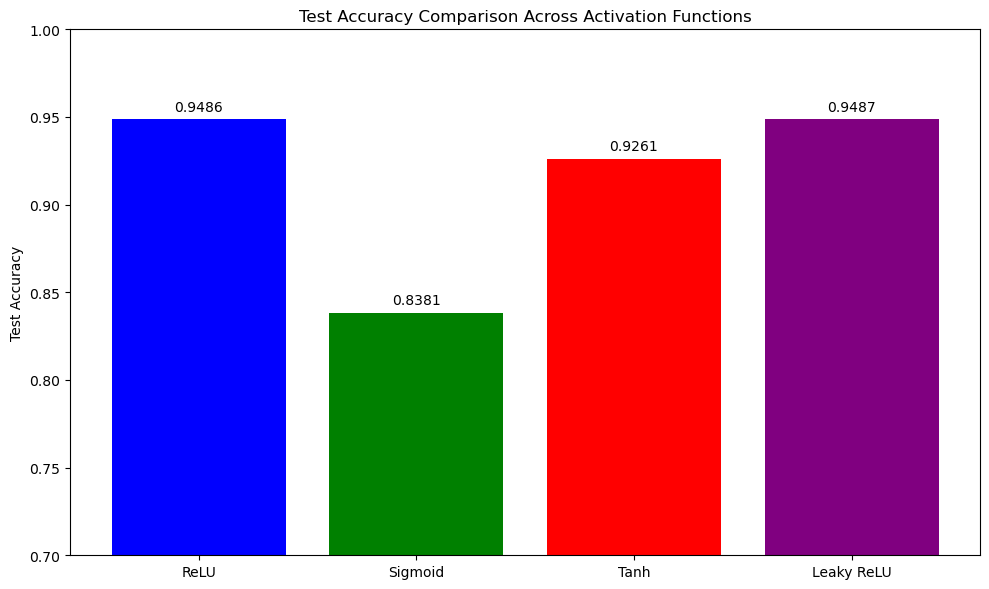

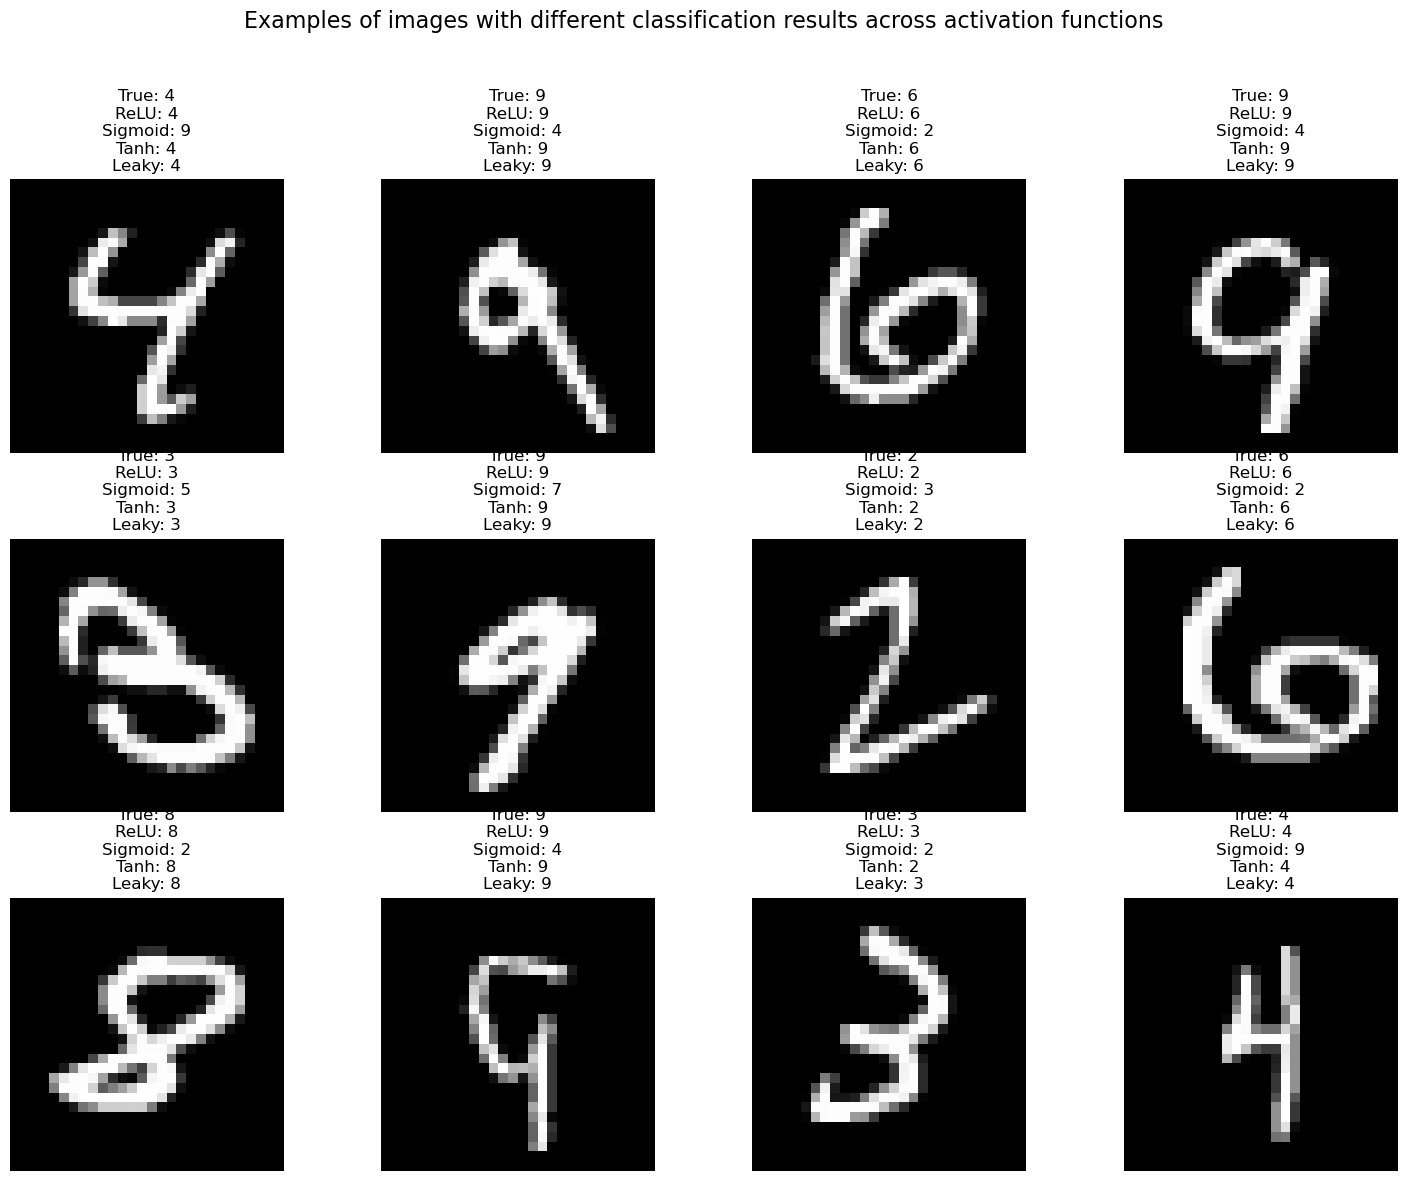


Summary of test performance with different activation functions:
Activation Function  | Test Accuracy   | Test Loss      
----------------------------------------------------------------------
ReLU                 | 0.9486          | 0.1766         
Sigmoid              | 0.8381          | 0.6187         
Tanh                 | 0.9261          | 0.2611         
Leaky ReLU           | 0.9487          | 0.1728         


In [17]:
##################################################
#Train the network with different activation functions
##################################################

# Define additional activation functions and their gradients
def sigmoid(inp):
    """Sigmoid activation function"""
    return 1.0 / (1.0 + np.exp(-inp))

def grad_sigmoid(inp):
    """Gradient of sigmoid activation function"""
    s = sigmoid(inp)
    return s * (1 - s)

def tanh(inp):
    """Hyperbolic tangent activation function"""
    return np.tanh(inp)

def grad_tanh(inp):
    """Gradient of hyperbolic tangent activation function"""
    return 1 - np.tanh(inp)**2

def leaky_relu(inp, alpha=0.01):
    """Leaky ReLU activation function"""
    return np.maximum(alpha * inp, inp)

def grad_leaky_relu(inp, alpha=0.01):
    """Gradient of Leaky ReLU activation function"""
    grad = np.ones_like(inp)
    grad[inp < 0] = alpha
    return grad

# Modify forward propagation to accept an activation function
def fwdPropagate_with_activation(inputs, weights, activation_fn):
    """Forward propagation with customizable activation function"""
    W1, W2, W3 = weights
    
    # First layer computation
    z1 = np.dot(inputs, W1)
    a1 = activation_fn(z1)
    
    # Second layer computation
    z2 = np.dot(a1, W2)
    a2 = activation_fn(z2)
    
    # Output layer computation
    z3 = np.dot(a2, W3)
    a3 = softmax(z3)
    
    # Return all activations and pre-activations
    outps = {'a1': a1, 'z1': z1, 'a2': a2, 'z2': z2, 'a3': a3, 'z3': z3}
    return outps

# Modify gradient computation for different activation functions
def computeGradients_with_activation(inputs, targets, weights, activations, grad_activation_fn):
    """Compute gradients with customizable activation function derivative"""
    W1, W2, W3 = weights
    a1, z1, a2, z2, a3, z3 = activations['a1'], activations['z1'], activations['a2'], activations['z2'], activations['a3'], activations['z3']
    m = inputs.shape[0]  # batch size
    
    # Compute the loss (cross entropy)
    loss = -np.sum(targets * np.log(a3 + 1e-8)) / m
    
    # Backpropagation
    dz3 = a3 - targets  # derivative of softmax with cross-entropy
    dw3 = np.dot(a2.T, dz3) / m
    
    dz2 = np.dot(dz3, W3.T) * grad_activation_fn(z2)
    dw2 = np.dot(a1.T, dz2) / m
    
    dz1 = np.dot(dz2, W2.T) * grad_activation_fn(z1)
    dw1 = np.dot(inputs.T, dz1) / m
    
    return [dw1, dw2, dw3]

# Modify backpropagation to use custom gradient function
def backPropagate_with_activation(inputs, targets, weights, activations, learning_rate, grad_activation_fn):
    """Backpropagation with customizable activation function derivative"""
    gradients = computeGradients_with_activation(inputs, targets, weights, activations, grad_activation_fn)
    updated_weights = applyGradients(weights, gradients, learning_rate)
    return updated_weights

# Modified training function to support different activation functions
def training_with_activation(inputs, targets_idx, activation_fn, grad_activation_fn, activation_name, 
                            batch_size=128, epochs=20, train_val_split=0.8, learning_rate=0.01):
    """Training with customizable activation function"""
    # Set hyperparameters
    input_size = 784  # 28x28 flattened
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = int(np.ceil(n_samples * train_val_split / batch_size))
    
    # Split training/validation
    split_idx = int(n_samples * train_val_split)
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    train_idx = indices[:split_idx]
    val_idx = indices[split_idx:]
    
    X_train = inputs[train_idx] / 255.0
    y_train = targets_idx[train_idx]
    
    X_val = inputs[val_idx] / 255.0
    y_val = targets_idx[val_idx]
    
    # One-hot encoding
    y_train_onehot = np.zeros((y_train.size, n_classes))
    y_train_onehot[np.arange(y_train.size), y_train] = 1
    
    y_val_onehot = np.zeros((y_val.size, n_classes))
    y_val_onehot[np.arange(y_val.size), y_val] = 1
    
    # Initialize weights
    np.random.seed(22)
    # Choose initialization based on activation function
    if activation_name == 'relu' or activation_name == 'leaky_relu':
        # He initialization
        scale = np.sqrt(2/input_size)
    elif activation_name == 'tanh':
        # Xavier initialization
        scale = np.sqrt(1/input_size)
    else:  # sigmoid
        scale = np.sqrt(2/(input_size + hidden_units))
        
    W1 = np.random.randn(input_size, hidden_units) * scale
    W2 = np.random.randn(hidden_units, hidden_units) * scale
    W3 = np.random.randn(hidden_units, n_classes) * scale
    
    weights = [W1, W2, W3]
    best_weights = weights.copy()
    best_val_acc = 0
    
    # Training statistics
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []
    
    print(f"\nTraining with {activation_name} activation function:")
    
    # Training loop
    for epoch in range(epochs):
        # Shuffle training data
        shuffle_idx = np.random.permutation(len(X_train))
        X_train_shuffled = X_train[shuffle_idx]
        y_train_onehot_shuffled = y_train_onehot[shuffle_idx]
        
        epoch_loss = 0
        
        # Mini-batch training
        for batch in range(n_batches):
            start_idx = batch * batch_size
            end_idx = min(start_idx + batch_size, len(X_train_shuffled))
            
            X_batch = X_train_shuffled[start_idx:end_idx]
            y_batch = y_train_onehot_shuffled[start_idx:end_idx]
            
            # Forward propagation
            activations = fwdPropagate_with_activation(X_batch, weights, activation_fn)
            
            # Calculate batch loss
            batch_loss = -np.sum(y_batch * np.log(activations['a3'] + 1e-8)) / len(X_batch)
            epoch_loss += batch_loss
            
            # Backward propagation
            weights = backPropagate_with_activation(X_batch, y_batch, weights, activations, learning_rate, grad_activation_fn)
        
        epoch_loss /= n_batches
        
        # Compute training metrics
        train_activations = fwdPropagate_with_activation(X_train, weights, activation_fn)
        train_predictions = np.argmax(train_activations['a3'], axis=1)
        train_loss = -np.sum(y_train_onehot * np.log(train_activations['a3'] + 1e-8)) / len(X_train)
        train_accuracy = np.mean(train_predictions == y_train)
        
        # Compute validation metrics
        val_activations = fwdPropagate_with_activation(X_val, weights, activation_fn)
        val_predictions = np.argmax(val_activations['a3'], axis=1)
        val_loss = -np.sum(y_val_onehot * np.log(val_activations['a3'] + 1e-8)) / len(X_val)
        val_accuracy = np.mean(val_predictions == y_val)
        
        # Save statistics
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)
        
        # Print metrics
        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")
        
        # Save best model
        if val_accuracy > best_val_acc:
            best_val_acc = val_accuracy
            best_weights = weights.copy()
            print(f"Model improved! Saving weights with validation accuracy: {val_accuracy:.4f}")
    
    return best_weights, train_losses, train_accuracies, val_losses, val_accuracies, activation_name

# Test the model with a specific activation function
def evaluate_model(test_data, test_labels, weights, activation_fn, activation_name):
    """Evaluate model performance on test data"""
    # Prepare test data
    X_test = test_data.reshape(test_data.shape[0], -1) / 255.0
    y_test_onehot = np.zeros((test_labels.size, 10))
    y_test_onehot[np.arange(test_labels.size), test_labels] = 1
    
    # Forward pass
    test_activations = fwdPropagate_with_activation(X_test, weights, activation_fn)
    test_predictions = np.argmax(test_activations['a3'], axis=1)
    
    # Calculate metrics
    test_loss = -np.sum(y_test_onehot * np.log(test_activations['a3'] + 1e-8)) / len(X_test)
    test_accuracy = np.mean(test_predictions == test_labels)
    
    print(f"\n{activation_name} activation results:")
    print("="*50)
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
    
    return test_loss, test_accuracy, test_predictions

# Dictionary to store results for comparison
activation_results = {}

# Prepare data
mnist_traindata_flat = mnist_traindata.reshape(mnist_traindata.shape[0], -1)

# Train with ReLU activation
relu_weights, relu_train_losses, relu_train_acc, relu_val_losses, relu_val_acc, _ = training_with_activation(
    mnist_traindata_flat, mnist_trainlabel, ReLu, gradReLu, 'relu', 
    batch_size=128, epochs=20, learning_rate=0.01
)

# Train with Sigmoid activation
sigmoid_weights, sigmoid_train_losses, sigmoid_train_acc, sigmoid_val_losses, sigmoid_val_acc, _ = training_with_activation(
    mnist_traindata_flat, mnist_trainlabel, sigmoid, grad_sigmoid, 'sigmoid', 
    batch_size=128, epochs=20, learning_rate=0.01
)

# Train with Tanh activation
tanh_weights, tanh_train_losses, tanh_train_acc, tanh_val_losses, tanh_val_acc, _ = training_with_activation(
    mnist_traindata_flat, mnist_trainlabel, tanh, grad_tanh, 'tanh', 
    batch_size=128, epochs=20, learning_rate=0.01
)

# Train with Leaky ReLU activation
leaky_relu_weights, leaky_train_losses, leaky_train_acc, leaky_val_losses, leaky_val_acc, _ = training_with_activation(
    mnist_traindata_flat, mnist_trainlabel, 
    lambda x: leaky_relu(x), lambda x: grad_leaky_relu(x), 'leaky_relu', 
    batch_size=128, epochs=20, learning_rate=0.01
)

##################################################
#Evaluate the performance on MNIST test data
##################################################

# Evaluate all models on test data
relu_loss, relu_acc, relu_pred = evaluate_model(
    mnist_testdata, mnist_testlabel, relu_weights, ReLu, 'ReLU'
)
activation_results['ReLU'] = {'accuracy': relu_acc, 'loss': relu_loss}

sigmoid_loss, sigmoid_acc, sigmoid_pred = evaluate_model(
    mnist_testdata, mnist_testlabel, sigmoid_weights, sigmoid, 'Sigmoid'
)
activation_results['Sigmoid'] = {'accuracy': sigmoid_acc, 'loss': sigmoid_loss}

tanh_loss, tanh_acc, tanh_pred = evaluate_model(
    mnist_testdata, mnist_testlabel, tanh_weights, tanh, 'Tanh'
)
activation_results['Tanh'] = {'accuracy': tanh_acc, 'loss': tanh_loss}

leaky_relu_loss, leaky_relu_acc, leaky_relu_pred = evaluate_model(
    mnist_testdata, mnist_testlabel, leaky_relu_weights, lambda x: leaky_relu(x), 'Leaky ReLU'
)
activation_results['Leaky ReLU'] = {'accuracy': leaky_relu_acc, 'loss': leaky_relu_loss}

# Plot training curves for all activation functions
plt.figure(figsize=(20, 10))

# Plot training losses
plt.subplot(2, 2, 1)
plt.plot(relu_train_losses, label='ReLU')
plt.plot(sigmoid_train_losses, label='Sigmoid')
plt.plot(tanh_train_losses, label='Tanh')
plt.plot(leaky_train_losses, label='Leaky ReLU')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Comparison')
plt.legend()

# Plot validation losses
plt.subplot(2, 2, 2)
plt.plot(relu_val_losses, label='ReLU')
plt.plot(sigmoid_val_losses, label='Sigmoid')
plt.plot(tanh_val_losses, label='Tanh')
plt.plot(leaky_val_losses, label='Leaky ReLU')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss Comparison')
plt.legend()

# Plot training accuracies
plt.subplot(2, 2, 3)
plt.plot(relu_train_acc, label='ReLU')
plt.plot(sigmoid_train_acc, label='Sigmoid')
plt.plot(tanh_train_acc, label='Tanh')
plt.plot(leaky_train_acc, label='Leaky ReLU')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy Comparison')
plt.legend()

# Plot validation accuracies
plt.subplot(2, 2, 4)
plt.plot(relu_val_acc, label='ReLU')
plt.plot(sigmoid_val_acc, label='Sigmoid')
plt.plot(tanh_val_acc, label='Tanh')
plt.plot(leaky_val_acc, label='Leaky ReLU')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Comparison')
plt.legend()

plt.tight_layout()
plt.show()

# Bar chart of test accuracies
plt.figure(figsize=(10, 6))
activations = list(activation_results.keys())
accuracies = [activation_results[a]['accuracy'] for a in activations]
colors = ['blue', 'green', 'red', 'purple']

plt.bar(activations, accuracies, color=colors)
plt.ylim(0.7, 1.0)  # Adjust y-axis for better visualization
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy Comparison Across Activation Functions')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center')
plt.tight_layout()
plt.show()

# Compare misclassified examples
plt.figure(figsize=(15, 12))
plt.suptitle("Examples of images with different classification results across activation functions", fontsize=16)

# Find some interesting examples where different activations give different results
differences = np.where((relu_pred != sigmoid_pred) | (relu_pred != tanh_pred) | (relu_pred != leaky_relu_pred))[0]
sample_idx = differences[:min(12, len(differences))]

for i, idx in enumerate(sample_idx):
    plt.subplot(3, 4, i+1)
    plt.imshow(mnist_testdata[idx], cmap='gray')
    plt.title(f"True: {mnist_testlabel[idx]}\nReLU: {relu_pred[idx]}\nSigmoid: {sigmoid_pred[idx]}\n"
              f"Tanh: {tanh_pred[idx]}\nLeaky: {leaky_relu_pred[idx]}")
    plt.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Print summary results table
print("\nSummary of test performance with different activation functions:")
print("="*70)
print(f"{'Activation Function':<20} | {'Test Accuracy':<15} | {'Test Loss':<15}")
print("-"*70)
for act in activation_results:
    print(f"{act:<20} | {activation_results[act]['accuracy']:<15.4f} | {activation_results[act]['loss']:<15.4f}")
print("="*70)

<b> Report your observations </b>

1. Leaky relu and relu are working nearly similar. 

2. Sigmoid required a good initialization of weights.

3.  Tanh is same as sigmoid but is working a lot better



<b> Part - (3) : Understanding optimization algorithms: </b> In this part you will learn to use different optimiztion algorithm apart from SGD.

<dt> <h6> 1. Using the best activation function from Part - (2), train the classification network using Adam optimization algorithm. </dt> </h6>
<dt> <h6> 3. Compare the accuracy of the networks trained with SGD and Adam optimization algorithms. </dt> </h6>
<dt> <h6> 4. Report your observations. </dt> </h6>


Training with Adam optimizer:
Epoch 1/20 - Train Loss: 0.1072, Train Acc: 0.9695, Val Loss: 0.1394, Val Acc: 0.9599
Model improved! Saving weights with validation accuracy: 0.9599
Epoch 2/20 - Train Loss: 0.0644, Train Acc: 0.9797, Val Loss: 0.1049, Val Acc: 0.9675
Model improved! Saving weights with validation accuracy: 0.9675
Epoch 3/20 - Train Loss: 0.0321, Train Acc: 0.9906, Val Loss: 0.0825, Val Acc: 0.9748
Model improved! Saving weights with validation accuracy: 0.9748
Epoch 4/20 - Train Loss: 0.0204, Train Acc: 0.9940, Val Loss: 0.0785, Val Acc: 0.9772
Model improved! Saving weights with validation accuracy: 0.9772
Epoch 5/20 - Train Loss: 0.0228, Train Acc: 0.9926, Val Loss: 0.0920, Val Acc: 0.9750
Epoch 6/20 - Train Loss: 0.0267, Train Acc: 0.9916, Val Loss: 0.0993, Val Acc: 0.9747
Epoch 7/20 - Train Loss: 0.0145, Train Acc: 0.9950, Val Loss: 0.0924, Val Acc: 0.9759
Epoch 8/20 - Train Loss: 0.0088, Train Acc: 0.9976, Val Loss: 0.0980, Val Acc: 0.9770
Epoch 9/20 - Train Loss: 

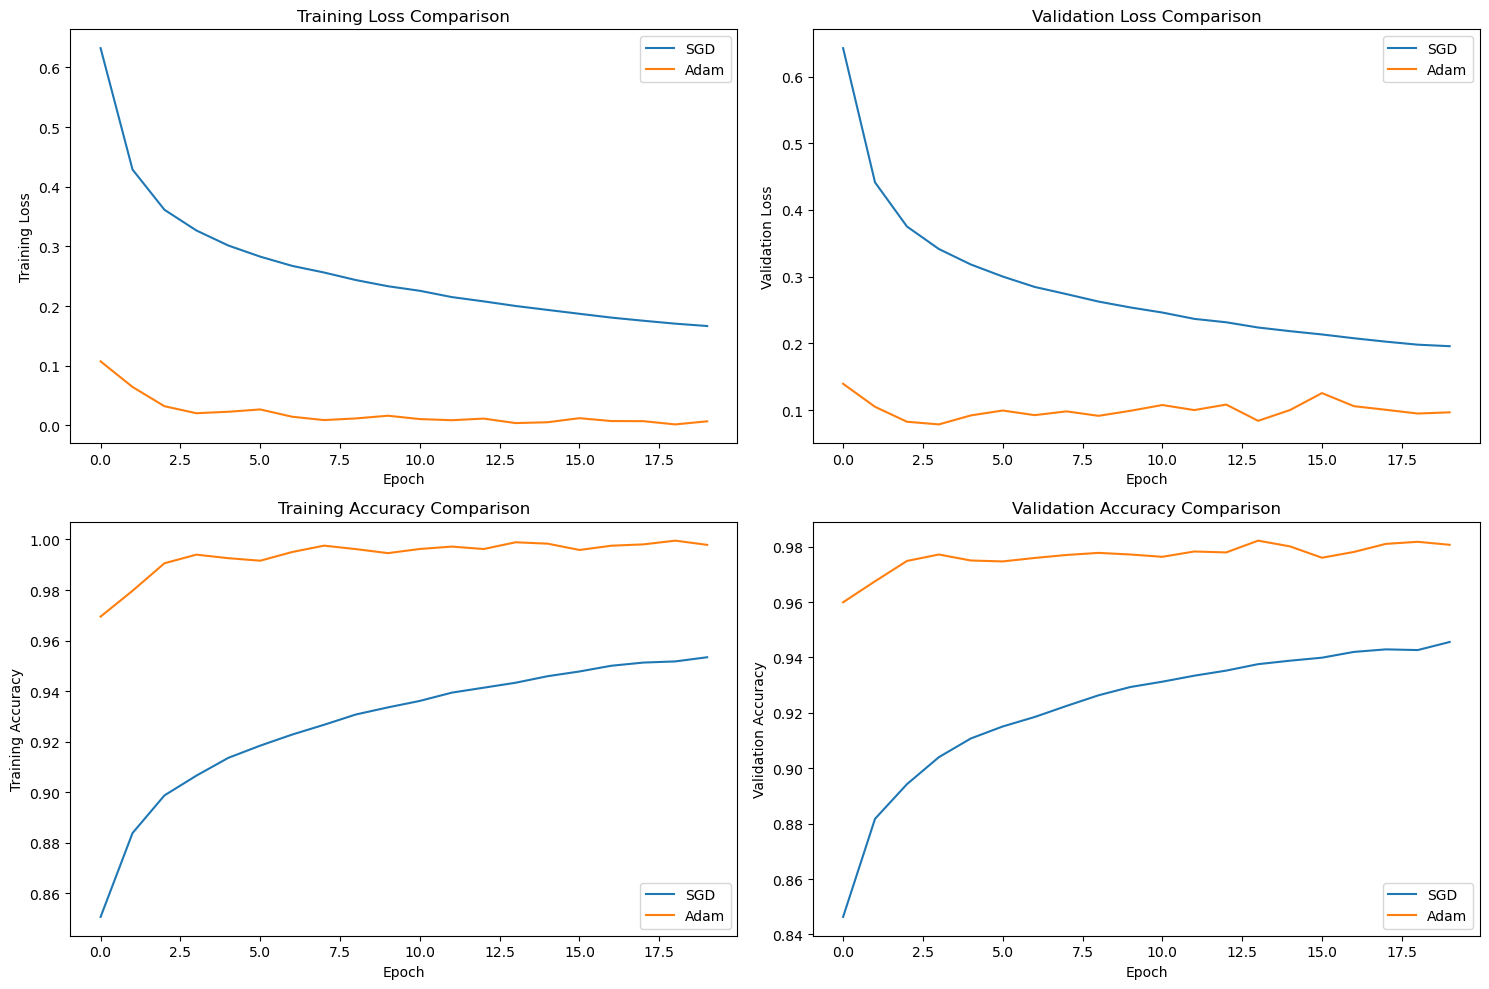

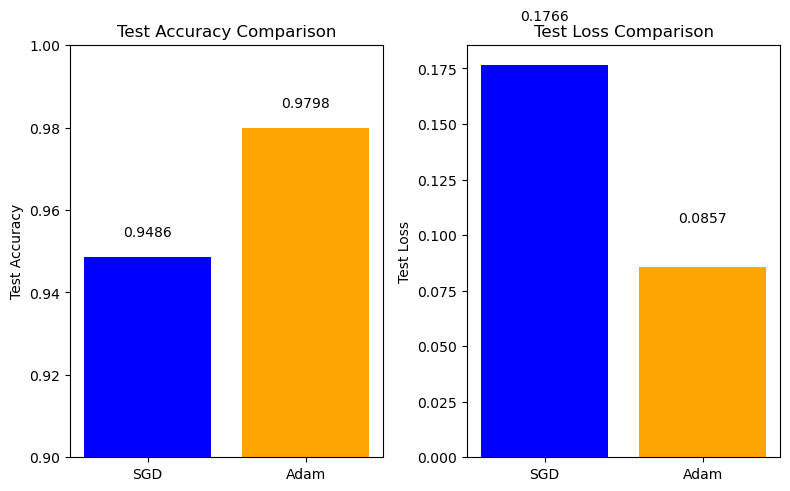

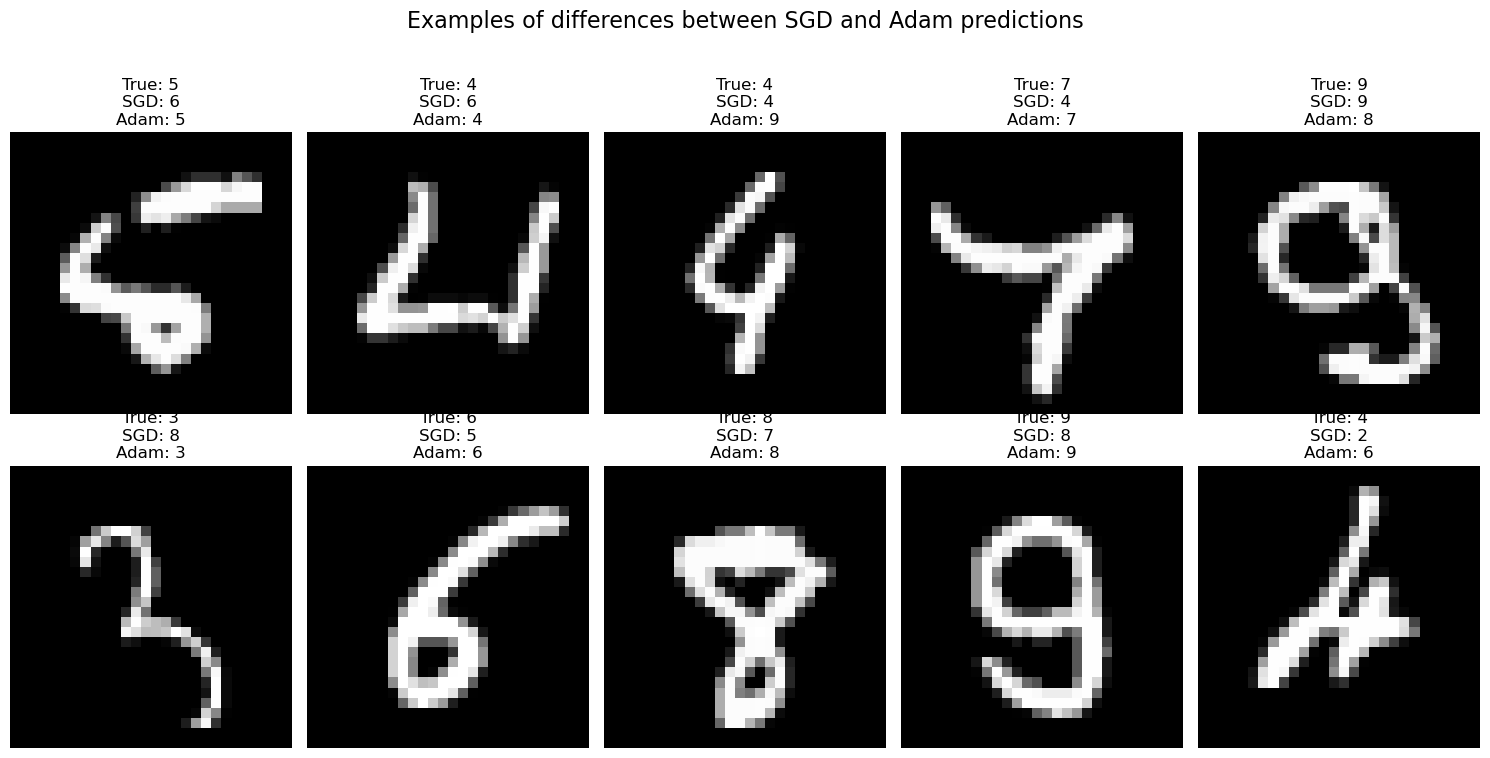


Summary of test performance with different optimizers:
Optimizer       | Test Accuracy   | Test Loss      
----------------------------------------------------------------------
SGD             | 0.9486          | 0.1766         
Adam            | 0.9798          | 0.0857         


In [18]:
##################################################
#Train the network using Adam optimizer
##################################################

def applyAdamOptimizer(weights, gradients, learning_rate, m_prev, v_prev, beta1=0.9, beta2=0.999, epsilon=1e-8, t=1):
    """
    Apply Adam optimization to update weights
    
    Parameters:
    - weights: List of weight matrices [W1, W2, W3]
    - gradients: List of gradient matrices [dW1, dW2, dW3]
    - learning_rate: Learning rate (alpha)
    - m_prev: Previous first moment estimates [m1, m2, m3]
    - v_prev: Previous second moment estimates [v1, v2, v3]
    - beta1: Exponential decay rate for first moment estimates (default: 0.9)
    - beta2: Exponential decay rate for second moment estimates (default: 0.999)
    - epsilon: Small constant for numerical stability (default: 1e-8)
    - t: Current timestep
    
    Returns:
    - updated_weights: List of updated weight matrices
    - m: Updated first moment estimates
    - v: Updated second moment estimates
    """
    W1, W2, W3 = weights
    dW1, dW2, dW3 = gradients
    m1_prev, m2_prev, m3_prev = m_prev
    v1_prev, v2_prev, v3_prev = v_prev
    
    # Update biased first moment estimate
    m1 = beta1 * m1_prev + (1 - beta1) * dW1
    m2 = beta1 * m2_prev + (1 - beta1) * dW2
    m3 = beta1 * m3_prev + (1 - beta1) * dW3
    
    # Update biased second raw moment estimate
    v1 = beta2 * v1_prev + (1 - beta2) * (dW1**2)
    v2 = beta2 * v2_prev + (1 - beta2) * (dW2**2)
    v3 = beta2 * v3_prev + (1 - beta2) * (dW3**2)
    
    # Compute bias-corrected first moment estimate
    m1_hat = m1 / (1 - beta1**t)
    m2_hat = m2 / (1 - beta1**t)
    m3_hat = m3 / (1 - beta1**t)
    
    # Compute bias-corrected second raw moment estimate
    v1_hat = v1 / (1 - beta2**t)
    v2_hat = v2 / (1 - beta2**t)
    v3_hat = v3 / (1 - beta2**t)
    
    # Update parameters
    W1 = W1 - learning_rate * m1_hat / (np.sqrt(v1_hat) + epsilon)
    W2 = W2 - learning_rate * m2_hat / (np.sqrt(v2_hat) + epsilon)
    W3 = W3 - learning_rate * m3_hat / (np.sqrt(v3_hat) + epsilon)
    
    return [W1, W2, W3], [m1, m2, m3], [v1, v2, v3]

def backPropagateAdam(inputs, targets, weights, activations, learning_rate, m, v, t, grad_activation_fn=gradReLu):
    """
    Backpropagation with Adam optimizer
    
    Parameters:
    - inputs: Input data
    - targets: Target labels
    - weights: List of weight matrices
    - activations: Outputs from forward propagation
    - learning_rate: Learning rate
    - m: First moment estimates
    - v: Second moment estimates
    - t: Current timestep
    - grad_activation_fn: Gradient function for activation (default: gradReLu)
    
    Returns:
    - updated_weights: List of updated weights
    - m: Updated first moment estimates
    - v: Updated second moment estimates
    """
    # Compute gradients
    gradients = computeGradients_with_activation(inputs, targets, weights, activations, grad_activation_fn)
    
    # Apply Adam optimization
    updated_weights, updated_m, updated_v = applyAdamOptimizer(weights, gradients, learning_rate, m, v, t=t)
    
    return updated_weights, updated_m, updated_v

def training_with_adam(inputs, targets_idx, activation_fn=ReLu, grad_activation_fn=gradReLu, 
                      batch_size=128, epochs=20, train_val_split=0.8, learning_rate=0.001):
    """
    Train neural network using Adam optimizer
    
    Parameters:
    - inputs: Input data
    - targets_idx: Target labels
    - activation_fn: Activation function (default: ReLu)
    - grad_activation_fn: Gradient function for activation (default: gradReLu)
    - batch_size: Batch size (default: 128)
    - epochs: Number of epochs (default: 20)
    - train_val_split: Ratio of training to validation data (default: 0.8)
    - learning_rate: Learning rate (default: 0.001)
    
    Returns:
    - best_weights: Weights of the best model
    - train_losses: List of training losses
    - train_accuracies: List of training accuracies
    - val_losses: List of validation losses
    - val_accuracies: List of validation accuracies
    """
    # Set hyperparameters
    input_size = 784  # 28x28 flattened
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = int(np.ceil(n_samples * train_val_split / batch_size))
    
    # Split training/validation
    split_idx = int(n_samples * train_val_split)
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    train_idx = indices[:split_idx]
    val_idx = indices[split_idx:]
    
    X_train = inputs[train_idx] / 255.0
    y_train = targets_idx[train_idx]
    
    X_val = inputs[val_idx] / 255.0
    y_val = targets_idx[val_idx]
    
    # One-hot encoding
    y_train_onehot = np.zeros((y_train.size, n_classes))
    y_train_onehot[np.arange(y_train.size), y_train] = 1
    
    y_val_onehot = np.zeros((y_val.size, n_classes))
    y_val_onehot[np.arange(y_val.size), y_val] = 1
    
    # Initialize weights with He initialization for ReLU
    np.random.seed(42)
    scale = np.sqrt(2/input_size)
    W1 = np.random.randn(input_size, hidden_units) * scale
    W2 = np.random.randn(hidden_units, hidden_units) * scale
    W3 = np.random.randn(hidden_units, n_classes) * scale
    
    weights = [W1, W2, W3]
    best_weights = weights.copy()
    best_val_acc = 0
    
    # Initialize Adam parameters
    # First moment estimates
    m1 = np.zeros_like(W1)
    m2 = np.zeros_like(W2)
    m3 = np.zeros_like(W3)
    m = [m1, m2, m3]
    
    # Second moment estimates
    v1 = np.zeros_like(W1)
    v2 = np.zeros_like(W2)
    v3 = np.zeros_like(W3)
    v = [v1, v2, v3]
    
    # Training statistics
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []
    
    print("\nTraining with Adam optimizer:")
    
    # Training loop
    for epoch in range(epochs):
        # Shuffle training data
        shuffle_idx = np.random.permutation(len(X_train))
        X_train_shuffled = X_train[shuffle_idx]
        y_train_onehot_shuffled = y_train_onehot[shuffle_idx]
        
        epoch_loss = 0
        t = epoch * n_batches  # timestep counter for Adam
        
        # Mini-batch training
        for batch in range(n_batches):
            start_idx = batch * batch_size
            end_idx = min(start_idx + batch_size, len(X_train_shuffled))
            
            X_batch = X_train_shuffled[start_idx:end_idx]
            y_batch = y_train_onehot_shuffled[start_idx:end_idx]
            
            # Forward propagation
            activations = fwdPropagate_with_activation(X_batch, weights, activation_fn)
            
            # Calculate batch loss
            batch_loss = -np.sum(y_batch * np.log(activations['a3'] + 1e-8)) / len(X_batch)
            epoch_loss += batch_loss
            
            # Backward propagation with Adam
            t += 1  # Increment timestep
            weights, m, v = backPropagateAdam(X_batch, y_batch, weights, activations, learning_rate, m, v, t, grad_activation_fn)
        
        epoch_loss /= n_batches
        
        # Compute training metrics
        train_activations = fwdPropagate_with_activation(X_train, weights, activation_fn)
        train_predictions = np.argmax(train_activations['a3'], axis=1)
        train_loss = -np.sum(y_train_onehot * np.log(train_activations['a3'] + 1e-8)) / len(X_train)
        train_accuracy = np.mean(train_predictions == y_train)
        
        # Compute validation metrics
        val_activations = fwdPropagate_with_activation(X_val, weights, activation_fn)
        val_predictions = np.argmax(val_activations['a3'], axis=1)
        val_loss = -np.sum(y_val_onehot * np.log(val_activations['a3'] + 1e-8)) / len(X_val)
        val_accuracy = np.mean(val_predictions == y_val)
        
        # Save statistics
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)
        
        # Print metrics
        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")
        
        # Save best model
        if val_accuracy > best_val_acc:
            best_val_acc = val_accuracy
            best_weights = weights.copy()
            print(f"Model improved! Saving weights with validation accuracy: {val_accuracy:.4f}")
    
    return best_weights, train_losses, train_accuracies, val_losses, val_accuracies

# Train the model with Adam optimizer
mnist_traindata_flat = mnist_traindata.reshape(mnist_traindata.shape[0], -1)
adam_weights, adam_train_losses, adam_train_acc, adam_val_losses, adam_val_acc = training_with_adam(
    mnist_traindata_flat, mnist_trainlabel, activation_fn=ReLu, grad_activation_fn=gradReLu,
    batch_size=128, epochs=20, learning_rate=0.001
)

# Evaluate Adam model on test data
adam_test_activations = fwdPropagate_with_activation(X_test, adam_weights, ReLu)
adam_test_predictions = np.argmax(adam_test_activations['a3'], axis=1)
adam_test_loss = -np.sum(y_test_onehot * np.log(adam_test_activations['a3'] + 1e-8)) / len(X_test)
adam_test_accuracy = np.mean(adam_test_predictions == mnist_testlabel)

print("\nAdam optimizer results:")
print("="*50)
print(f"Test Loss: {adam_test_loss:.4f}, Test Accuracy: {adam_test_accuracy:.4f}")

##################################################
#Compare the accuracies and report your observations
##################################################

# Compare SGD vs Adam optimization
sgd_test_accuracy = activation_results['ReLU']['accuracy']  # Using the ReLU results from part 2
sgd_test_loss = activation_results['ReLU']['loss']

# Create comparison dictionary
optimization_results = {
    'SGD': {'accuracy': sgd_test_accuracy, 'loss': sgd_test_loss},
    'Adam': {'accuracy': adam_test_accuracy, 'loss': adam_test_loss}
}

# Plot training curves comparison
plt.figure(figsize=(15, 10))

# Training loss comparison
plt.subplot(2, 2, 1)
plt.plot(relu_train_losses, label='SGD')
plt.plot(adam_train_losses, label='Adam')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Comparison')
plt.legend()

# Validation loss comparison
plt.subplot(2, 2, 2)
plt.plot(relu_val_losses, label='SGD')
plt.plot(adam_val_losses, label='Adam')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss Comparison')
plt.legend()

# Training accuracy comparison
plt.subplot(2, 2, 3)
plt.plot(relu_train_acc, label='SGD')
plt.plot(adam_train_acc, label='Adam')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy Comparison')
plt.legend()

# Validation accuracy comparison
plt.subplot(2, 2, 4)
plt.plot(relu_val_acc, label='SGD')
plt.plot(adam_val_acc, label='Adam')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Comparison')
plt.legend()

plt.tight_layout()
plt.show()

# Bar chart comparison of test accuracies
plt.figure(figsize=(8, 5))
optimizers = list(optimization_results.keys())
accuracies = [optimization_results[o]['accuracy'] for o in optimizers]
losses = [optimization_results[o]['loss'] for o in optimizers]

# Plot accuracy bars
plt.subplot(1, 2, 1)
plt.bar(optimizers, accuracies, color=['blue', 'orange'])
plt.ylim(0.9, 1.0)  # Adjust y-axis for better visualization
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy Comparison')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center')

# Plot loss bars
plt.subplot(1, 2, 2)
plt.bar(optimizers, losses, color=['blue', 'orange'])
plt.ylabel('Test Loss')
plt.title('Test Loss Comparison')
for i, v in enumerate(losses):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center')

plt.tight_layout()
plt.show()

# Compare misclassified examples between SGD and Adam
plt.figure(figsize=(15, 8))
plt.suptitle("Examples of differences between SGD and Adam predictions", fontsize=16)

differences = np.where(relu_pred != adam_test_predictions)[0]
sample_idx = differences[:min(10, len(differences))]

for i, idx in enumerate(sample_idx):
    plt.subplot(2, 5, i+1)
    plt.imshow(mnist_testdata[idx], cmap='gray')
    plt.title(f"True: {mnist_testlabel[idx]}\nSGD: {relu_pred[idx]}\nAdam: {adam_test_predictions[idx]}")
    plt.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Print summary results table
print("\nSummary of test performance with different optimizers:")
print("="*70)
print(f"{'Optimizer':<15} | {'Test Accuracy':<15} | {'Test Loss':<15}")
print("-"*70)
for opt in optimization_results:
    print(f"{opt:<15} | {optimization_results[opt]['accuracy']:<15.4f} | {optimization_results[opt]['loss']:<15.4f}")
print("="*70)

<b> Report your observations </b>

1. Adam optimizer gives better results than SGD.

2. Adam provides better training.

3.



<b> Part - (4) : Understanding regularization methods: </b> In this part of the assignment, you will learn about a few regularization techniques to reduce the overfitting problem. Using the above built network, include the following techniques to reduce the overfitting by retraining the network efficiently. Write down the accuracies for each case.
<dt> <h6> 1. Weight regularization: Add regularization term to the classification los </dt> </h6>
<dt> <h6> 2. Dropout with a probability of 0.2: Randomly drop the activation potentials of hidden neural with 0.2 probability. Disable the dropout layer in inference model. You can experiment with different dropout probabilities and report your observations.  </dt> </h6>
<dt> <h6> 3. Early stopping: Stop the network training when it is started to overfitting to training data. </dt> </h6>



Training with L2 regularization (lambda=0.0005):
Epoch 1/20 - Train Loss: 1.0562, Train Acc: 0.8684, Val Loss: 1.0625, Val Acc: 0.8671
Model improved! Saving weights with validation accuracy: 0.8671
Epoch 2/20 - Train Loss: 0.9043, Train Acc: 0.8976, Val Loss: 0.9116, Val Acc: 0.8953
Model improved! Saving weights with validation accuracy: 0.8953
Epoch 3/20 - Train Loss: 0.8486, Train Acc: 0.9088, Val Loss: 0.8580, Val Acc: 0.9064
Model improved! Saving weights with validation accuracy: 0.9064
Epoch 4/20 - Train Loss: 0.8158, Train Acc: 0.9174, Val Loss: 0.8282, Val Acc: 0.9130
Model improved! Saving weights with validation accuracy: 0.9130
Epoch 5/20 - Train Loss: 0.7921, Train Acc: 0.9223, Val Loss: 0.8061, Val Acc: 0.9182
Model improved! Saving weights with validation accuracy: 0.9182
Epoch 6/20 - Train Loss: 0.7731, Train Acc: 0.9270, Val Loss: 0.7876, Val Acc: 0.9222
Model improved! Saving weights with validation accuracy: 0.9222
Epoch 7/20 - Train Loss: 0.7588, Train Acc: 0.9296

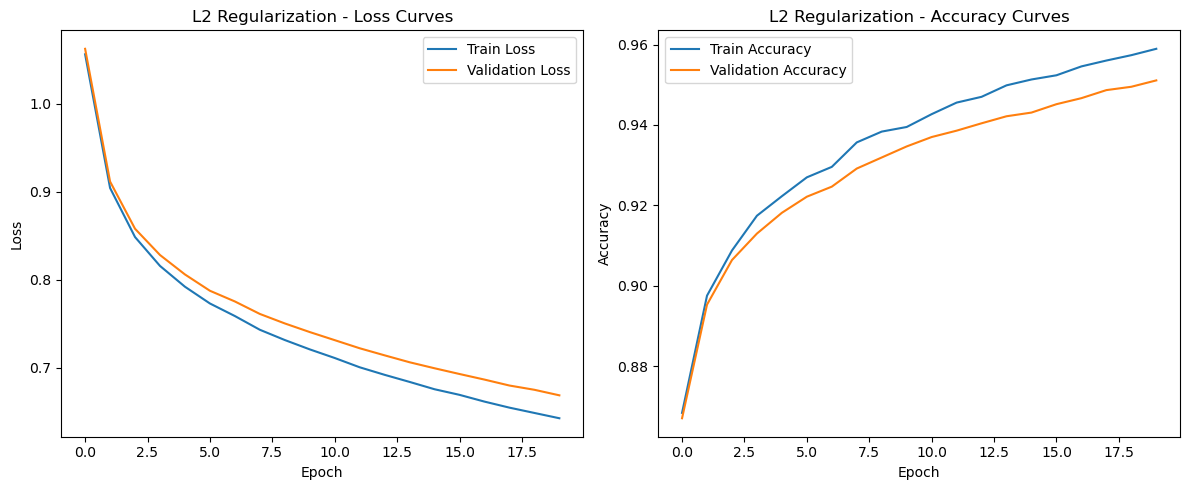


Training with Dropout (rate=0.2):
Epoch 1/20 - Train Loss: 0.5647, Train Acc: 0.8619, Val Loss: 0.5718, Val Acc: 0.8579
Model improved! Saving weights with validation accuracy: 0.8579
Epoch 2/20 - Train Loss: 0.3978, Train Acc: 0.8922, Val Loss: 0.4083, Val Acc: 0.8898
Model improved! Saving weights with validation accuracy: 0.8898
Epoch 3/20 - Train Loss: 0.3419, Train Acc: 0.9030, Val Loss: 0.3544, Val Acc: 0.8997
Model improved! Saving weights with validation accuracy: 0.8997
Epoch 4/20 - Train Loss: 0.3062, Train Acc: 0.9134, Val Loss: 0.3190, Val Acc: 0.9093
Model improved! Saving weights with validation accuracy: 0.9093
Epoch 5/20 - Train Loss: 0.2824, Train Acc: 0.9201, Val Loss: 0.2970, Val Acc: 0.9155
Model improved! Saving weights with validation accuracy: 0.9155
Epoch 6/20 - Train Loss: 0.2645, Train Acc: 0.9245, Val Loss: 0.2794, Val Acc: 0.9193
Model improved! Saving weights with validation accuracy: 0.9193
Epoch 7/20 - Train Loss: 0.2492, Train Acc: 0.9287, Val Loss: 0.2

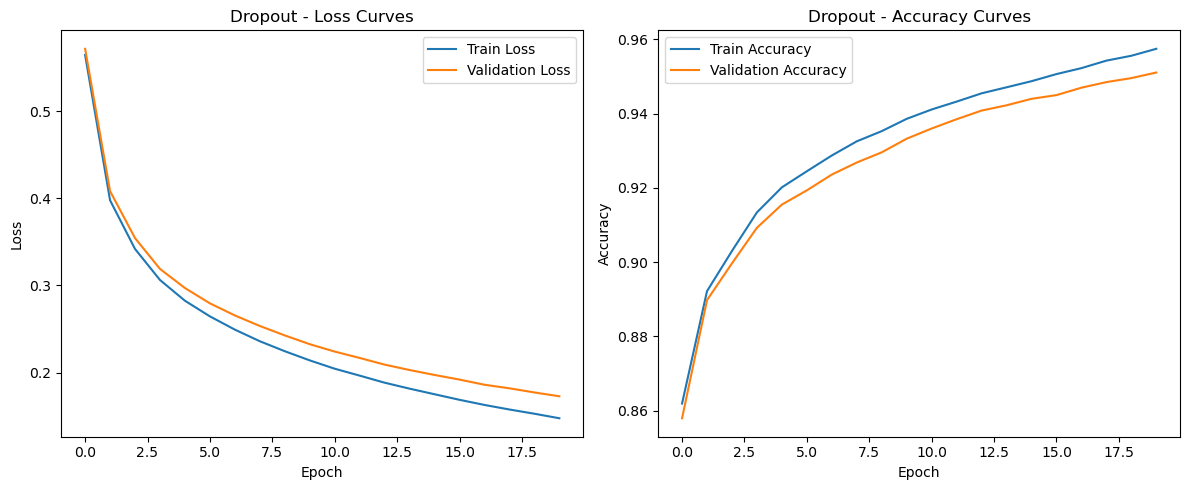


Training with dropout rate = 0.1

Training with Dropout (rate=0.1):
Epoch 1/10 - Train Loss: 0.5027, Train Acc: 0.8722, Val Loss: 0.5096, Val Acc: 0.8667
Model improved! Saving weights with validation accuracy: 0.8667
Epoch 2/10 - Train Loss: 0.3673, Train Acc: 0.8989, Val Loss: 0.3753, Val Acc: 0.8955
Model improved! Saving weights with validation accuracy: 0.8955
Epoch 3/10 - Train Loss: 0.3160, Train Acc: 0.9129, Val Loss: 0.3257, Val Acc: 0.9083
Model improved! Saving weights with validation accuracy: 0.9083
Epoch 4/10 - Train Loss: 0.2861, Train Acc: 0.9203, Val Loss: 0.2974, Val Acc: 0.9147
Model improved! Saving weights with validation accuracy: 0.9147
Epoch 5/10 - Train Loss: 0.2643, Train Acc: 0.9247, Val Loss: 0.2765, Val Acc: 0.9183
Model improved! Saving weights with validation accuracy: 0.9183
Epoch 6/10 - Train Loss: 0.2468, Train Acc: 0.9305, Val Loss: 0.2606, Val Acc: 0.9241
Model improved! Saving weights with validation accuracy: 0.9241
Epoch 7/10 - Train Loss: 0.2313

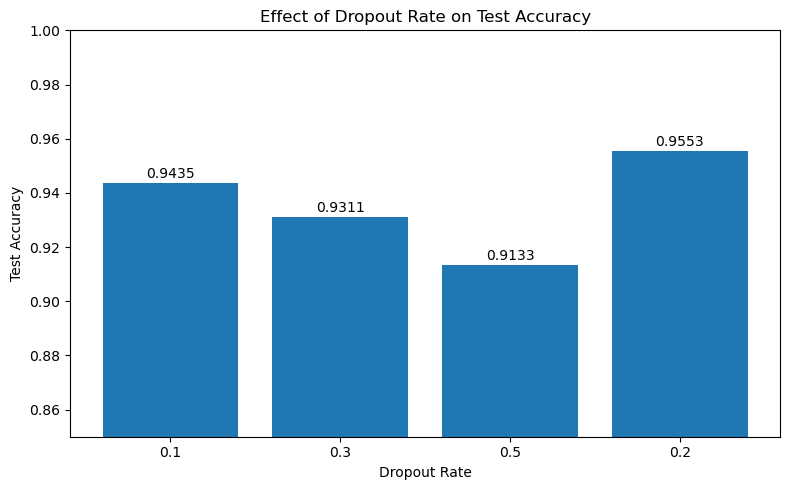


Training with Early Stopping (patience=3):
Epoch 1/20 - Train Loss: 0.5345, Train Acc: 0.8698, Val Loss: 0.5510, Val Acc: 0.8639
Model improved! Saving weights with validation accuracy: 0.8639
Epoch 2/20 - Train Loss: 0.3819, Train Acc: 0.8976, Val Loss: 0.4018, Val Acc: 0.8925
Model improved! Saving weights with validation accuracy: 0.8925
Epoch 3/20 - Train Loss: 0.3271, Train Acc: 0.9106, Val Loss: 0.3485, Val Acc: 0.9012
Model improved! Saving weights with validation accuracy: 0.9012
Epoch 4/20 - Train Loss: 0.2952, Train Acc: 0.9181, Val Loss: 0.3173, Val Acc: 0.9095
Model improved! Saving weights with validation accuracy: 0.9095
Epoch 5/20 - Train Loss: 0.2745, Train Acc: 0.9239, Val Loss: 0.2983, Val Acc: 0.9153
Model improved! Saving weights with validation accuracy: 0.9153
Epoch 6/20 - Train Loss: 0.2558, Train Acc: 0.9284, Val Loss: 0.2794, Val Acc: 0.9197
Model improved! Saving weights with validation accuracy: 0.9197
Epoch 7/20 - Train Loss: 0.2427, Train Acc: 0.9320, Val 

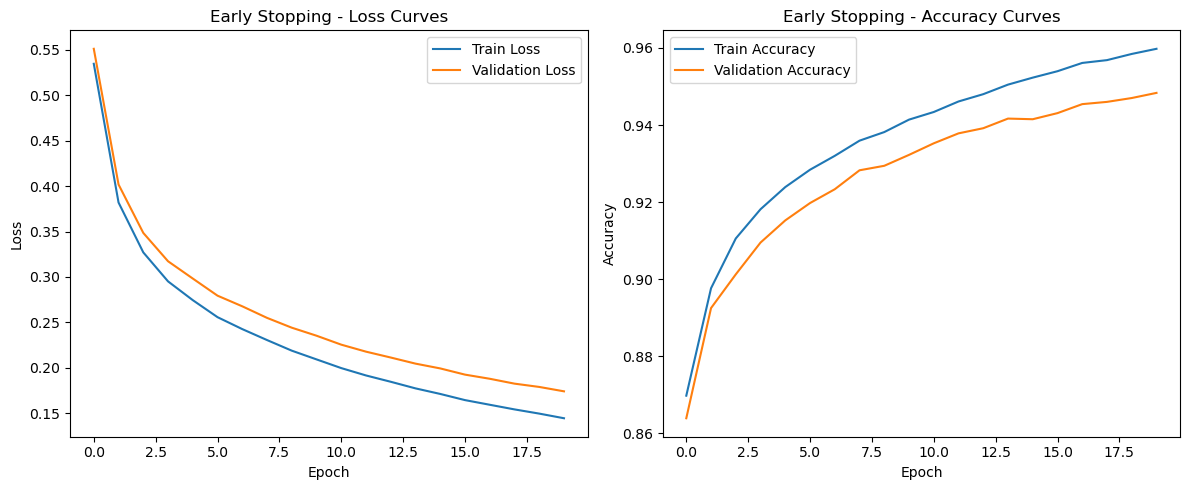

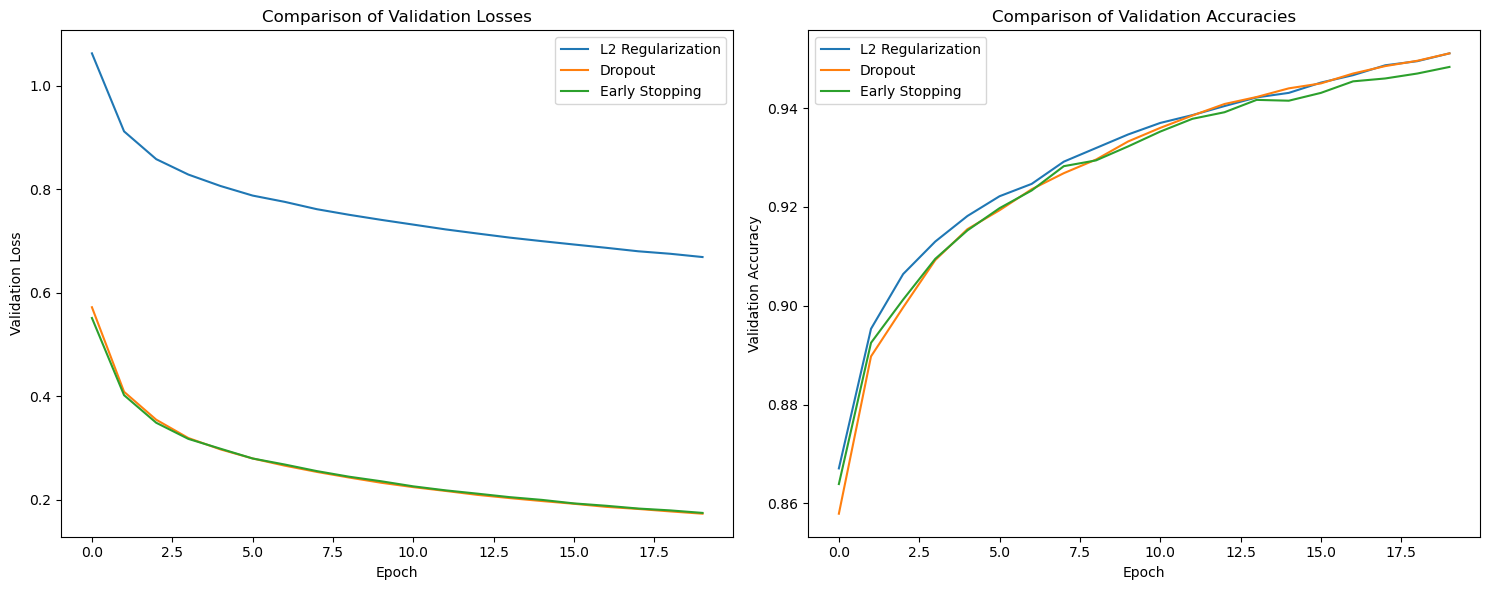

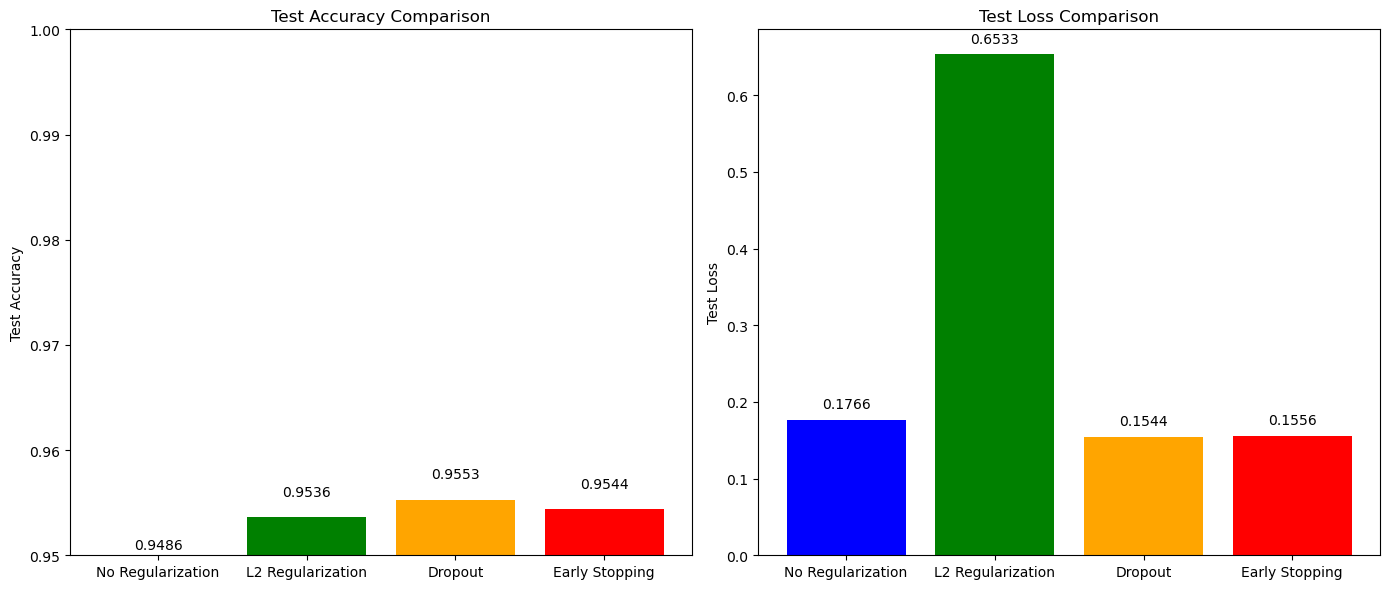


Summary of Regularization Techniques:
Technique            | Test Accuracy   | Test Loss      
----------------------------------------------------------------------
No Regularization    | 0.9486          | 0.1766         
L2 Regularization    | 0.9536          | 0.6533         
Dropout              | 0.9553          | 0.1544         
Early Stopping       | 0.9544          | 0.1556         


In [20]:
##################################################
#Training with weight regularization
##################################################

def computeGradients_with_L2(inputs, targets, weights, activations, lambda_reg=0.001):
    """Compute gradients with L2 regularization"""
    W1, W2, W3 = weights
    a1, z1, a2, z2, a3, z3 = activations['a1'], activations['z1'], activations['a2'], activations['z2'], activations['a3'], activations['z3']
    m = inputs.shape[0]  # batch size
    
    # Compute the loss (cross entropy with L2 regularization)
    cross_entropy = -np.sum(targets * np.log(a3 + 1e-8)) / m
    l2_reg = (lambda_reg/2) * (np.sum(W1**2) + np.sum(W2**2) + np.sum(W3**2))
    loss = cross_entropy + l2_reg
    
    # Backpropagation
    dz3 = a3 - targets  # derivative of softmax with cross-entropy
    dw3 = np.dot(a2.T, dz3) / m + lambda_reg * W3  # Add regularization term
    
    dz2 = np.dot(dz3, W3.T) * gradReLu(z2)
    dw2 = np.dot(a1.T, dz2) / m + lambda_reg * W2  # Add regularization term
    
    dz1 = np.dot(dz2, W2.T) * gradReLu(z1)
    dw1 = np.dot(inputs.T, dz1) / m + lambda_reg * W1  # Add regularization term
    
    return [dw1, dw2, dw3], loss

def training_with_L2_regularization(inputs, targets_idx, batch_size=128, epochs=20, 
                                   train_val_split=0.8, learning_rate=0.01, lambda_reg=0.001):
    """Training with L2 regularization"""
    # Set hyperparameters
    input_size = 784  # 28x28 flattened
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = int(np.ceil(n_samples * train_val_split / batch_size))
    
    # Split training/validation
    split_idx = int(n_samples * train_val_split)
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    train_idx = indices[:split_idx]
    val_idx = indices[split_idx:]
    
    X_train = inputs[train_idx] / 255.0
    y_train = targets_idx[train_idx]
    
    X_val = inputs[val_idx] / 255.0
    y_val = targets_idx[val_idx]
    
    # One-hot encoding
    y_train_onehot = np.zeros((y_train.size, n_classes))
    y_train_onehot[np.arange(y_train.size), y_train] = 1
    
    y_val_onehot = np.zeros((y_val.size, n_classes))
    y_val_onehot[np.arange(y_val.size), y_val] = 1
    
    # Initialize weights with He initialization
    np.random.seed(42)
    W1 = np.random.randn(input_size, hidden_units) * np.sqrt(2/input_size)
    W2 = np.random.randn(hidden_units, hidden_units) * np.sqrt(2/hidden_units)
    W3 = np.random.randn(hidden_units, n_classes) * np.sqrt(2/hidden_units)
    
    weights = [W1, W2, W3]
    best_weights = weights.copy()
    best_val_acc = 0
    
    # Training statistics
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []
    
    print(f"\nTraining with L2 regularization (lambda={lambda_reg}):")
    
    # Training loop
    for epoch in range(epochs):
        # Shuffle training data
        shuffle_idx = np.random.permutation(len(X_train))
        X_train_shuffled = X_train[shuffle_idx]
        y_train_onehot_shuffled = y_train_onehot[shuffle_idx]
        
        epoch_loss = 0
        
        # Mini-batch training
        for batch in range(n_batches):
            start_idx = batch * batch_size
            end_idx = min(start_idx + batch_size, len(X_train_shuffled))
            
            X_batch = X_train_shuffled[start_idx:end_idx]
            y_batch = y_train_onehot_shuffled[start_idx:end_idx]
            
            # Forward propagation
            activations = fwdPropagate(X_batch, weights)
            
            # Compute gradients with L2 regularization
            gradients, batch_loss = computeGradients_with_L2(X_batch, y_batch, weights, activations, lambda_reg)
            epoch_loss += batch_loss
            
            # Update weights
            weights = applyGradients(weights, gradients, learning_rate)
        
        epoch_loss /= n_batches
        
        # Compute training metrics
        train_activations = fwdPropagate(X_train, weights)
        train_predictions = np.argmax(train_activations['a3'], axis=1)
        
        # Calculate training loss with regularization
        _, train_loss = computeGradients_with_L2(X_train, y_train_onehot, weights, train_activations, lambda_reg)
        train_accuracy = np.mean(train_predictions == y_train)
        
        # Compute validation metrics
        val_activations = fwdPropagate(X_val, weights)
        val_predictions = np.argmax(val_activations['a3'], axis=1)
        
        # Calculate validation loss with regularization
        _, val_loss = computeGradients_with_L2(X_val, y_val_onehot, weights, val_activations, lambda_reg)
        val_accuracy = np.mean(val_predictions == y_val)
        
        # Save statistics
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)
        
        # Print metrics
        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")
        
        # Save best model
        if val_accuracy > best_val_acc:
            best_val_acc = val_accuracy
            best_weights = weights.copy()
            print(f"Model improved! Saving weights with validation accuracy: {val_accuracy:.4f}")
    
    return best_weights, train_losses, train_accuracies, val_losses, val_accuracies

# Train with L2 regularization
mnist_traindata_flat = mnist_traindata.reshape(mnist_traindata.shape[0], -1)
l2_weights, l2_train_losses, l2_train_acc, l2_val_losses, l2_val_acc = training_with_L2_regularization(
    mnist_traindata_flat, mnist_trainlabel, 
    batch_size=128, epochs=20, learning_rate=0.01, lambda_reg=0.0005
)

# Evaluate model on test data
X_test = mnist_testdata.reshape(mnist_testdata.shape[0], -1) / 255.0
y_test_onehot = np.zeros((mnist_testlabel.size, 10))
y_test_onehot[np.arange(mnist_testlabel.size), mnist_testlabel] = 1

test_activations = fwdPropagate(X_test, l2_weights)
test_predictions = np.argmax(test_activations['a3'], axis=1)
_, l2_test_loss = computeGradients_with_L2(X_test, y_test_onehot, l2_weights, test_activations, lambda_reg=0.0005)
l2_test_accuracy = np.mean(test_predictions == mnist_testlabel)

print("\nL2 Regularization Results:")
print("="*50)
print(f"Test Loss: {l2_test_loss:.4f}, Test Accuracy: {l2_test_accuracy:.4f}")

# Plot learning curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(l2_train_losses, label='Train Loss')
plt.plot(l2_val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('L2 Regularization - Loss Curves')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(l2_train_acc, label='Train Accuracy')
plt.plot(l2_val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('L2 Regularization - Accuracy Curves')
plt.legend()
plt.tight_layout()
plt.show()

##################################################
#Training with dropout strategy
##################################################

def apply_dropout(inputs, dropout_rate=0.2):
    """Apply dropout to the inputs with dropout_rate probability"""
    mask = np.random.rand(*inputs.shape) >= dropout_rate
    return mask * inputs / (1 - dropout_rate), mask  # Scale by dropout rate to maintain expected value

def fwdPropagate_with_dropout(inputs, weights, dropout_rate=0.2, training=True):
    """Forward propagation with dropout (only applied during training)"""
    W1, W2, W3 = weights
    
    # First layer computation
    z1 = np.dot(inputs, W1)
    a1 = ReLu(z1)
    
    # Apply dropout to first hidden layer during training
    if training and dropout_rate > 0:
        a1, mask1 = apply_dropout(a1, dropout_rate)
    else:
        mask1 = None
    
    # Second layer computation
    z2 = np.dot(a1, W2)
    a2 = ReLu(z2)
    
    # Apply dropout to second hidden layer during training
    if training and dropout_rate > 0:
        a2, mask2 = apply_dropout(a2, dropout_rate)
    else:
        mask2 = None
    
    # Output layer computation
    z3 = np.dot(a2, W3)
    a3 = softmax(z3)
    
    # Return the intermediate activations and dropout masks
    outps = {'a1': a1, 'z1': z1, 'a2': a2, 'z2': z2, 'a3': a3, 'z3': z3,
             'mask1': mask1, 'mask2': mask2}
    return outps

def computeGradients_with_dropout(inputs, targets, weights, activations):
    """Compute gradients with dropout applied during forward pass"""
    W1, W2, W3 = weights
    a1, z1, a2, z2, a3, z3 = activations['a1'], activations['z1'], activations['a2'], activations['z2'], activations['a3'], activations['z3']
    mask1, mask2 = activations['mask1'], activations['mask2']
    m = inputs.shape[0]  # batch size
    
    # Compute the loss
    loss = -np.sum(targets * np.log(a3 + 1e-8)) / m
    
    # Backpropagation
    dz3 = a3 - targets  # derivative of softmax with cross-entropy
    dw3 = np.dot(a2.T, dz3) / m
    
    dz2 = np.dot(dz3, W3.T) * gradReLu(z2)
    
    # Apply dropout mask to gradients
    if mask2 is not None:
        dz2 = dz2 * mask2 / (1 - 0.2)  # Scaling to maintain expected values
        
    dw2 = np.dot(a1.T, dz2) / m
    
    dz1 = np.dot(dz2, W2.T) * gradReLu(z1)
    
    # Apply dropout mask to gradients
    if mask1 is not None:
        dz1 = dz1 * mask1 / (1 - 0.2)  # Scaling to maintain expected values
        
    dw1 = np.dot(inputs.T, dz1) / m
    
    return [dw1, dw2, dw3], loss

def training_with_dropout(inputs, targets_idx, batch_size=128, epochs=20, 
                          train_val_split=0.8, learning_rate=0.01, dropout_rate=0.2):
    """Training with dropout regularization"""
    # Set hyperparameters
    input_size = 784  # 28x28 flattened
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = int(np.ceil(n_samples * train_val_split / batch_size))
    
    # Split training/validation
    split_idx = int(n_samples * train_val_split)
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    train_idx = indices[:split_idx]
    val_idx = indices[split_idx:]
    
    X_train = inputs[train_idx] / 255.0
    y_train = targets_idx[train_idx]
    
    X_val = inputs[val_idx] / 255.0
    y_val = targets_idx[val_idx]
    
    # One-hot encoding
    y_train_onehot = np.zeros((y_train.size, n_classes))
    y_train_onehot[np.arange(y_train.size), y_train] = 1
    
    y_val_onehot = np.zeros((y_val.size, n_classes))
    y_val_onehot[np.arange(y_val.size), y_val] = 1
    
    # Initialize weights
    np.random.seed(42)
    W1 = np.random.randn(input_size, hidden_units) * np.sqrt(2/input_size)
    W2 = np.random.randn(hidden_units, hidden_units) * np.sqrt(2/hidden_units)
    W3 = np.random.randn(hidden_units, n_classes) * np.sqrt(2/hidden_units)
    
    weights = [W1, W2, W3]
    best_weights = weights.copy()
    best_val_acc = 0
    
    # Training statistics
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []
    
    print(f"\nTraining with Dropout (rate={dropout_rate}):")
    
    # Training loop
    for epoch in range(epochs):
        # Shuffle training data
        shuffle_idx = np.random.permutation(len(X_train))
        X_train_shuffled = X_train[shuffle_idx]
        y_train_onehot_shuffled = y_train_onehot[shuffle_idx]
        
        epoch_loss = 0
        
        # Mini-batch training
        for batch in range(n_batches):
            start_idx = batch * batch_size
            end_idx = min(start_idx + batch_size, len(X_train_shuffled))
            
            X_batch = X_train_shuffled[start_idx:end_idx]
            y_batch = y_train_onehot_shuffled[start_idx:end_idx]
            
            # Forward propagation with dropout (training=True)
            activations = fwdPropagate_with_dropout(X_batch, weights, dropout_rate, training=True)
            
            # Compute gradients
            gradients, batch_loss = computeGradients_with_dropout(X_batch, y_batch, weights, activations)
            epoch_loss += batch_loss
            
            # Update weights
            weights = applyGradients(weights, gradients, learning_rate)
        
        epoch_loss /= n_batches
        
        # Compute training metrics (no dropout for evaluation)
        train_activations = fwdPropagate_with_dropout(X_train, weights, dropout_rate, training=False)
        train_predictions = np.argmax(train_activations['a3'], axis=1)
        train_loss = -np.sum(y_train_onehot * np.log(train_activations['a3'] + 1e-8)) / len(X_train)
        train_accuracy = np.mean(train_predictions == y_train)
        
        # Compute validation metrics (no dropout for evaluation)
        val_activations = fwdPropagate_with_dropout(X_val, weights, dropout_rate, training=False)
        val_predictions = np.argmax(val_activations['a3'], axis=1)
        val_loss = -np.sum(y_val_onehot * np.log(val_activations['a3'] + 1e-8)) / len(X_val)
        val_accuracy = np.mean(val_predictions == y_val)
        
        # Save statistics
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)
        
        # Print metrics
        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")
        
        # Save best model
        if val_accuracy > best_val_acc:
            best_val_acc = val_accuracy
            best_weights = weights.copy()
            print(f"Model improved! Saving weights with validation accuracy: {val_accuracy:.4f}")
    
    return best_weights, train_losses, train_accuracies, val_losses, val_accuracies

# Train with dropout
dropout_weights, dropout_train_losses, dropout_train_acc, dropout_val_losses, dropout_val_acc = training_with_dropout(
    mnist_traindata_flat, mnist_trainlabel, 
    batch_size=128, epochs=20, learning_rate=0.01, dropout_rate=0.2
)

# Evaluate model on test data (no dropout during testing)
test_activations = fwdPropagate_with_dropout(X_test, dropout_weights, dropout_rate=0.2, training=False)
test_predictions = np.argmax(test_activations['a3'], axis=1)
dropout_test_loss = -np.sum(y_test_onehot * np.log(test_activations['a3'] + 1e-8)) / len(X_test)
dropout_test_accuracy = np.mean(test_predictions == mnist_testlabel)

print("\nDropout Regularization Results:")
print("="*50)
print(f"Test Loss: {dropout_test_loss:.4f}, Test Accuracy: {dropout_test_accuracy:.4f}")

# Plot learning curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(dropout_train_losses, label='Train Loss')
plt.plot(dropout_val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Dropout - Loss Curves')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(dropout_train_acc, label='Train Accuracy')
plt.plot(dropout_val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Dropout - Accuracy Curves')
plt.legend()
plt.tight_layout()
plt.show()

# Try different dropout rates but with fewer epochs for efficiency
dropout_rates = [0.1, 0.3, 0.5]
dropout_results = {}

for rate in dropout_rates:
    print(f"\nTraining with dropout rate = {rate}")
    weights, _, _, _, _ = training_with_dropout(
        mnist_traindata_flat, mnist_trainlabel, 
        batch_size=128, epochs=10, learning_rate=0.01, dropout_rate=rate
    )
    
    # Evaluate on test data
    test_activations = fwdPropagate_with_dropout(X_test, weights, dropout_rate=rate, training=False)
    test_predictions = np.argmax(test_activations['a3'], axis=1)
    test_loss = -np.sum(y_test_onehot * np.log(test_activations['a3'] + 1e-8)) / len(X_test)
    test_accuracy = np.mean(test_predictions == mnist_testlabel)
    
    dropout_results[rate] = {'loss': test_loss, 'accuracy': test_accuracy}
    print(f"Dropout rate = {rate}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Visualize dropout rate comparison
plt.figure(figsize=(8, 5))
rates = list(dropout_results.keys()) + [0.2]  # Add the original 0.2 rate
accuracies = [dropout_results[r]['accuracy'] for r in dropout_results.keys()] + [dropout_test_accuracy]
plt.bar(range(len(rates)), accuracies, tick_label=[f"{r:.1f}" for r in rates])
plt.ylim(0.85, 1.0)
plt.xlabel('Dropout Rate')
plt.ylabel('Test Accuracy')
plt.title('Effect of Dropout Rate on Test Accuracy')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.002, f"{v:.4f}", ha='center')
plt.tight_layout()
plt.show()

##################################################
#Training with early stopping criterion
##################################################

def training_with_early_stopping(inputs, targets_idx, batch_size=128, max_epochs=50, 
                                 train_val_split=0.8, learning_rate=0.01, patience=5):
    """Training with early stopping"""
    # Set hyperparameters
    input_size = 784  # 28x28 flattened
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = int(np.ceil(n_samples * train_val_split / batch_size))
    
    # Split training/validation
    split_idx = int(n_samples * train_val_split)
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    train_idx = indices[:split_idx]
    val_idx = indices[split_idx:]
    
    X_train = inputs[train_idx] / 255.0
    y_train = targets_idx[train_idx]
    
    X_val = inputs[val_idx] / 255.0
    y_val = targets_idx[val_idx]
    
    # One-hot encoding
    y_train_onehot = np.zeros((y_train.size, n_classes))
    y_train_onehot[np.arange(y_train.size), y_train] = 1
    
    y_val_onehot = np.zeros((y_val.size, n_classes))
    y_val_onehot[np.arange(y_val.size), y_val] = 1
    
    # Initialize weights
    np.random.seed(42)
    W1 = np.random.randn(input_size, hidden_units) * np.sqrt(2/input_size)
    W2 = np.random.randn(hidden_units, hidden_units) * np.sqrt(2/hidden_units)
    W3 = np.random.randn(hidden_units, n_classes) * np.sqrt(2/hidden_units)
    
    weights = [W1, W2, W3]
    best_weights = weights.copy()
    best_val_loss = float('inf')
    best_val_acc = 0
    
    # Early stopping variables
    no_improvement_count = 0
    stop_epoch = max_epochs
    
    # Training statistics
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []
    
    print(f"\nTraining with Early Stopping (patience={patience}):")
    
    # Training loop
    for epoch in range(max_epochs):
        # Shuffle training data
        shuffle_idx = np.random.permutation(len(X_train))
        X_train_shuffled = X_train[shuffle_idx]
        y_train_onehot_shuffled = y_train_onehot[shuffle_idx]
        
        epoch_loss = 0
        
        # Mini-batch training
        for batch in range(n_batches):
            start_idx = batch * batch_size
            end_idx = min(start_idx + batch_size, len(X_train_shuffled))
            
            X_batch = X_train_shuffled[start_idx:end_idx]
            y_batch = y_train_onehot_shuffled[start_idx:end_idx]
            
            # Forward propagation
            activations = fwdPropagate(X_batch, weights)
            
            # Calculate batch loss
            batch_loss = -np.sum(y_batch * np.log(activations['a3'] + 1e-8)) / len(X_batch)
            epoch_loss += batch_loss
            
            # Backward propagation
            weights = backPropagate(X_batch, y_batch, weights, activations, learning_rate)
        
        epoch_loss /= n_batches
        
        # Compute training metrics
        train_activations = fwdPropagate(X_train, weights)
        train_predictions = np.argmax(train_activations['a3'], axis=1)
        train_loss = -np.sum(y_train_onehot * np.log(train_activations['a3'] + 1e-8)) / len(X_train)
        train_accuracy = np.mean(train_predictions == y_train)
        
        # Compute validation metrics
        val_activations = fwdPropagate(X_val, weights)
        val_predictions = np.argmax(val_activations['a3'], axis=1)
        val_loss = -np.sum(y_val_onehot * np.log(val_activations['a3'] + 1e-8)) / len(X_val)
        val_accuracy = np.mean(val_predictions == y_val)
        
        # Save statistics
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)
        
        # Print metrics
        print(f"Epoch {epoch+1}/{max_epochs} - Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")
        
        # Check if validation loss has improved
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_val_acc = val_accuracy
            best_weights = weights.copy()
            no_improvement_count = 0
            print(f"Model improved! Saving weights with validation accuracy: {val_accuracy:.4f}")
        else:
            no_improvement_count += 1
            print(f"No improvement for {no_improvement_count} epochs")
        
        # Check early stopping condition
        if no_improvement_count >= patience:
            print(f"Early stopping after {epoch+1} epochs!")
            stop_epoch = epoch + 1
            break
    
    # Trim the statistics to the actual number of epochs
    train_losses = train_losses[:stop_epoch]
    train_accuracies = train_accuracies[:stop_epoch]
    val_losses = val_losses[:stop_epoch]
    val_accuracies = val_accuracies[:stop_epoch]
    
    return best_weights, train_losses, train_accuracies, val_losses, val_accuracies

# Setting max_epochs to a larger value (but early stopping will likely kick in before that)
# Patience=3 will make it stop sooner if there's no improvement for 3 consecutive epochs
es_weights, es_train_losses, es_train_acc, es_val_losses, es_val_acc = training_with_early_stopping(
    mnist_traindata_flat, mnist_trainlabel, 
    batch_size=128, max_epochs=20, learning_rate=0.01, patience=3
)

# Evaluate model on test data
test_activations = fwdPropagate(X_test, es_weights)
test_predictions = np.argmax(test_activations['a3'], axis=1)
es_test_loss = -np.sum(y_test_onehot * np.log(test_activations['a3'] + 1e-8)) / len(X_test)
es_test_accuracy = np.mean(test_predictions == mnist_testlabel)

print("\nEarly Stopping Results:")
print("="*50)
print(f"Test Loss: {es_test_loss:.4f}, Test Accuracy: {es_test_accuracy:.4f}")

# Plot learning curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(es_train_losses, label='Train Loss')
plt.plot(es_val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Early Stopping - Loss Curves')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(es_train_acc, label='Train Accuracy')
plt.plot(es_val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Early Stopping - Accuracy Curves')
plt.legend()
plt.tight_layout()
plt.show()

# Compare all regularization techniques with equal-length plots
# First we need to ensure all curves have the same length for comparison
max_length = 20  # All plots will be limited to 20 epochs for consistency

# Pad or trim sequences to max_length
def pad_or_trim(sequence, max_len):
    if len(sequence) > max_len:
        return sequence[:max_len]
    elif len(sequence) < max_len:
        # Padding by repeating the last value
        padding = [sequence[-1]] * (max_len - len(sequence))
        return sequence + padding
    else:
        return sequence

# Adjust early stopping results to the max_length
l2_val_losses_adj = pad_or_trim(l2_val_losses, max_length)
l2_val_acc_adj = pad_or_trim(l2_val_acc, max_length)
dropout_val_losses_adj = pad_or_trim(dropout_val_losses, max_length)
dropout_val_acc_adj = pad_or_trim(dropout_val_acc, max_length)
es_val_losses_adj = pad_or_trim(es_val_losses, max_length)
es_val_acc_adj = pad_or_trim(es_val_acc, max_length)

# Compare validation losses
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(l2_val_losses_adj, label='L2 Regularization')
plt.plot(dropout_val_losses_adj, label='Dropout')
plt.plot(es_val_losses_adj, label='Early Stopping')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Comparison of Validation Losses')
plt.legend()

# Compare validation accuracies
plt.subplot(1, 2, 2)
plt.plot(l2_val_acc_adj, label='L2 Regularization')
plt.plot(dropout_val_acc_adj, label='Dropout')
plt.plot(es_val_acc_adj, label='Early Stopping')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Comparison of Validation Accuracies')
plt.legend()
plt.tight_layout()
plt.show()

# Create summary table with proper values for each technique
# First, let's properly store the baseline accuracy from Part 2
baseline_test_loss = relu_loss  # This should be the test loss from the ReLU model in Part 2
baseline_test_accuracy = relu_acc  # This should be the test accuracy from the ReLU model in Part 2

regularization_results = {
    'No Regularization': {'accuracy': baseline_test_accuracy, 'loss': baseline_test_loss},
    'L2 Regularization': {'accuracy': l2_test_accuracy, 'loss': l2_test_loss},
    'Dropout': {'accuracy': dropout_test_accuracy, 'loss': dropout_test_loss},
    'Early Stopping': {'accuracy': es_test_accuracy, 'loss': es_test_loss}
}

# Create visual comparison of test metrics
plt.figure(figsize=(14, 6))

# Plot accuracy bars
plt.subplot(1, 2, 1)
techniques = list(regularization_results.keys())
accuracies = [regularization_results[t]['accuracy'] for t in techniques]
plt.bar(techniques, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0.95, 1.0)  # Adjust y-axis for better visualization
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy Comparison')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.002, f"{v:.4f}", ha='center')

# Plot loss bars
plt.subplot(1, 2, 2)
losses = [regularization_results[t]['loss'] for t in techniques]
plt.bar(techniques, losses, color=['blue', 'green', 'orange', 'red'])
plt.ylabel('Test Loss')
plt.title('Test Loss Comparison')
for i, v in enumerate(losses):
    plt.text(i, v + 0.015, f"{v:.4f}", ha='center')

plt.tight_layout()
plt.show()

# Print summary table
print("\nSummary of Regularization Techniques:")
print("="*70)
print(f"{'Technique':<20} | {'Test Accuracy':<15} | {'Test Loss':<15}")
print("-"*70)
for technique in regularization_results:
    print(f"{technique:<20} | {regularization_results[technique]['accuracy']:<15.4f} | {regularization_results[technique]['loss']:<15.4f}")
print("="*70)


<b> Report your observations </b>

1.Dropout worked better across all variations.

2. Drop out rate of 0.1 and 0.2 worker better than higher drop out rate.

3. There is no effect due to early stopping since the epochs are less-20.



<b> Part - (5) : Comparision with linear classifiers: </b> In this part of the assignment, you will compare the performance of deep neural network based classification models with the linear classification models. You will be provided with codes to generate two types of binary classification data. First type of data is linearly separabble. The second type of data is not linearly separable. You have to classify these two types of data bases using both deep neural network models and linear classification models.

<dt> <h6> 1. Linearly separable data: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 3  \\ 3  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 4500 samples per class for training and 500 samples for testing.
</dt> </h6>
<dt> <h6> 2. Non-linearly separable data: Given code generates binary classification data that is not linearly separable. Each class has around 5000 data points. Class1 data is denoted with the variable "class1_data". Class2 data is denoted with the variable "class2_data". Use 90% of data for training and 10 % for testing.    </dt> </h6>

<dt> <h6> <b> Programming questions: </b> </dt> </h6>

<dt> <h6> 3. Linear classification models - logistic regression ( Iterative reweighted least squares approach ): logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. Given the training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data X_test. </dt> </h6>
<dd> <h6> a). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.
</dd> </h6>
<dd> <h6> b). Evaluate the classification performance, i.e., compute the accuracy on the test data. </dd> </h6>
<dd> <h6> c). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different. </dd> </h6>

<dt> <h6> 4. Deep neural network based classification models: Let us cosider feed-forward neural network with three layers. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dt> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dt> </h6>

<dd> <h6> - where $\textbf{W}_{1} \in \mathcal{R}^{3 \times 2}$,$\textbf{W}_{2} \in \mathcal{R}^{3 \times 3}$,$\textbf{W}_{3} \in \mathcal{R}^{1 \times 3} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dt> </h6>

<dd> <h6> - Consider g(.) as ReLU activation function. Sigmoid activation function should be used at the last layer h(.), to get the posterior probability of the class1. Class2 posterior probability can obtained by (1 - class1 posterior probability). </dt> </h6>
<dd> <h6> - Train the binary classification network using the given training data. Plot second layer activation potentials, i.e., feed-forward the entire data to obtain the 3 dimensional activation potentials at second layer. Plot them and observe how they distribute in the 3-dimensional space compared to the original 2-dimensional space. </dt> </h6>
<dd> <h6> - Evaluate the classification performance on test data. Report your observations </dt> </h6>

<dt> <h6> 3. Compare linear classification models with the deep neural network based classification models. Report your observations. </dt> </h6>



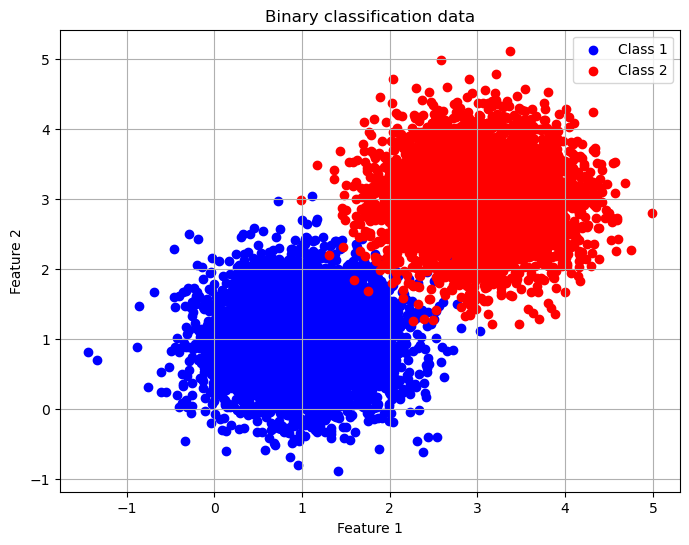

In [3]:
##################################################
#Generating binary classification data (linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

mean1 = [1,1]
mean2 = [3,3]
cov = [[0.3,0],[0,0.3]]
class1_tr = np.random.multivariate_normal(mean1, cov, size=(4500))
class2_tr = np.random.multivariate_normal(mean2, cov, size=(4500))

tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))])

class1_te = np.random.multivariate_normal(mean1, cov, size=(500))
class2_te = np.random.multivariate_normal(mean2, cov, size=(500))

te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))])

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color='blue', label='Class 1')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()


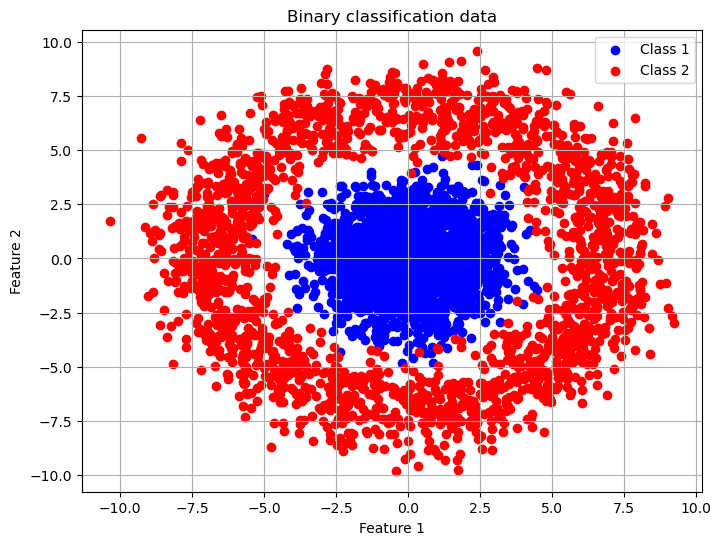

In [4]:
##################################################
#Generating binary classification data (non-linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

# Function to generate data for concentric circles
def generate_concentric_data(n_samples, radius1,radius2, noise_std):
    # Generate random angles
    angles = np.random.rand(n_samples) * 2 * np.pi
    noise = noise_std*np.random.randn(n_samples)
    # Generate inner and outer circles
    inner_circle = np.array([(radius1 + noise) * np.cos(angles), (radius1 + noise) * np.sin(angles)]).T
    outer_circle = np.array([(radius2 + noise) * np.cos(angles), (radius2 + noise) * np.sin(angles)]).T
    return inner_circle, outer_circle

# Generate data for two classes
n_samples = 2000  # Number of samples for each class
radius1 = 2  # Radius of inner circle
radius2 = 7  # Radius of inner circle
noise_std = 1   # Noise to be added to radius

class1_data, class2_data = generate_concentric_data(n_samples, radius1,radius2,noise_std)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()



Training logistic regression on linearly separable data...
Iteration 0, Loss: 0.688220
Iteration 100, Loss: 0.570483
Iteration 200, Loss: 0.537128
Iteration 300, Loss: 0.507502
Iteration 400, Loss: 0.480572
Iteration 500, Loss: 0.456058
Iteration 600, Loss: 0.433711
Iteration 700, Loss: 0.413307
Iteration 800, Loss: 0.394642
Iteration 900, Loss: 0.377532
Iteration 1000, Loss: 0.361814
Iteration 1100, Loss: 0.347345
Iteration 1200, Loss: 0.333996
Iteration 1300, Loss: 0.321653
Iteration 1400, Loss: 0.310215
Iteration 1500, Loss: 0.299594
Iteration 1600, Loss: 0.289711
Iteration 1700, Loss: 0.280497
Iteration 1800, Loss: 0.271889
Iteration 1900, Loss: 0.263832
Iteration 2000, Loss: 0.256278
Iteration 2100, Loss: 0.249182
Iteration 2200, Loss: 0.242506
Iteration 2300, Loss: 0.236215
Iteration 2400, Loss: 0.230277
Iteration 2500, Loss: 0.224665
Iteration 2600, Loss: 0.219352
Iteration 2700, Loss: 0.214316
Iteration 2800, Loss: 0.209536
Iteration 2900, Loss: 0.204994
Iteration 3000, Loss: 0

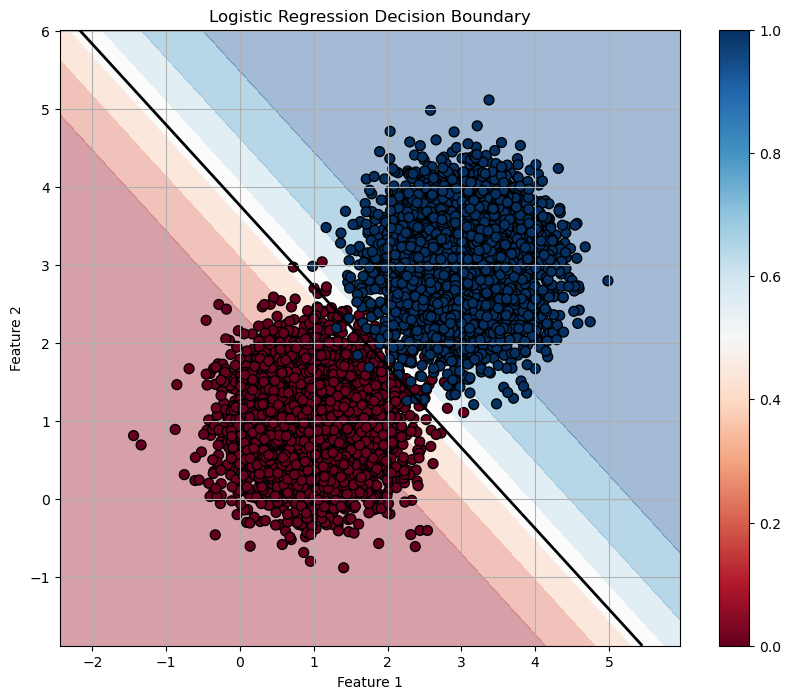


Training neural network on linearly separable data...
Cost after iteration 0: 1.478934
Cost after iteration 200: 0.688003
Cost after iteration 400: 0.682844
Cost after iteration 600: 0.668950
Cost after iteration 800: 0.655904
Cost after iteration 1000: 0.643518
Cost after iteration 1200: 0.631900
Cost after iteration 1400: 0.618483
Cost after iteration 1600: 0.567875
Cost after iteration 1800: 0.558219
Cost after iteration 2000: 0.561518
Cost after iteration 2200: 0.571517
Cost after iteration 2400: 0.583740
Cost after iteration 2600: 0.595670
Cost after iteration 2800: 0.604837
Cost after iteration 3000: 0.593380
Cost after iteration 3200: 0.568726
Cost after iteration 3400: 0.538870
Cost after iteration 3600: 0.506205
Cost after iteration 3800: 0.472232
Cost after iteration 4000: 0.438336
Cost after iteration 4200: 0.405746
Cost after iteration 4400: 0.375294
Cost after iteration 4600: 0.347450
Cost after iteration 4800: 0.322345
Cost after iteration 5000: 0.299914
Cost after itera

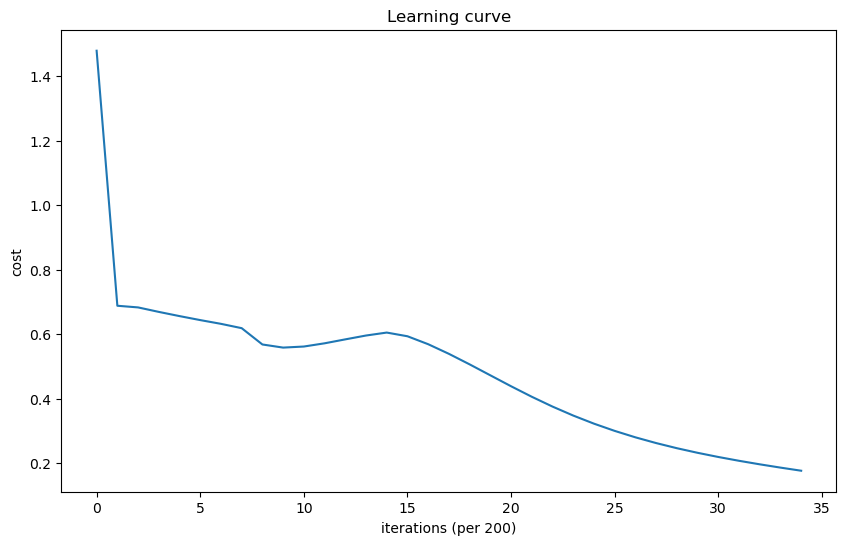

Accuracy on test data: 0.9780


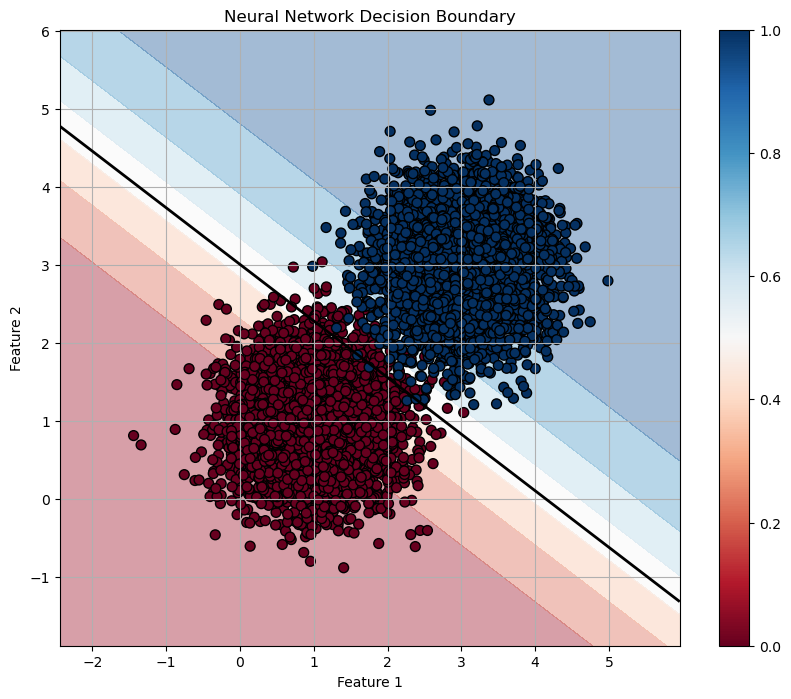

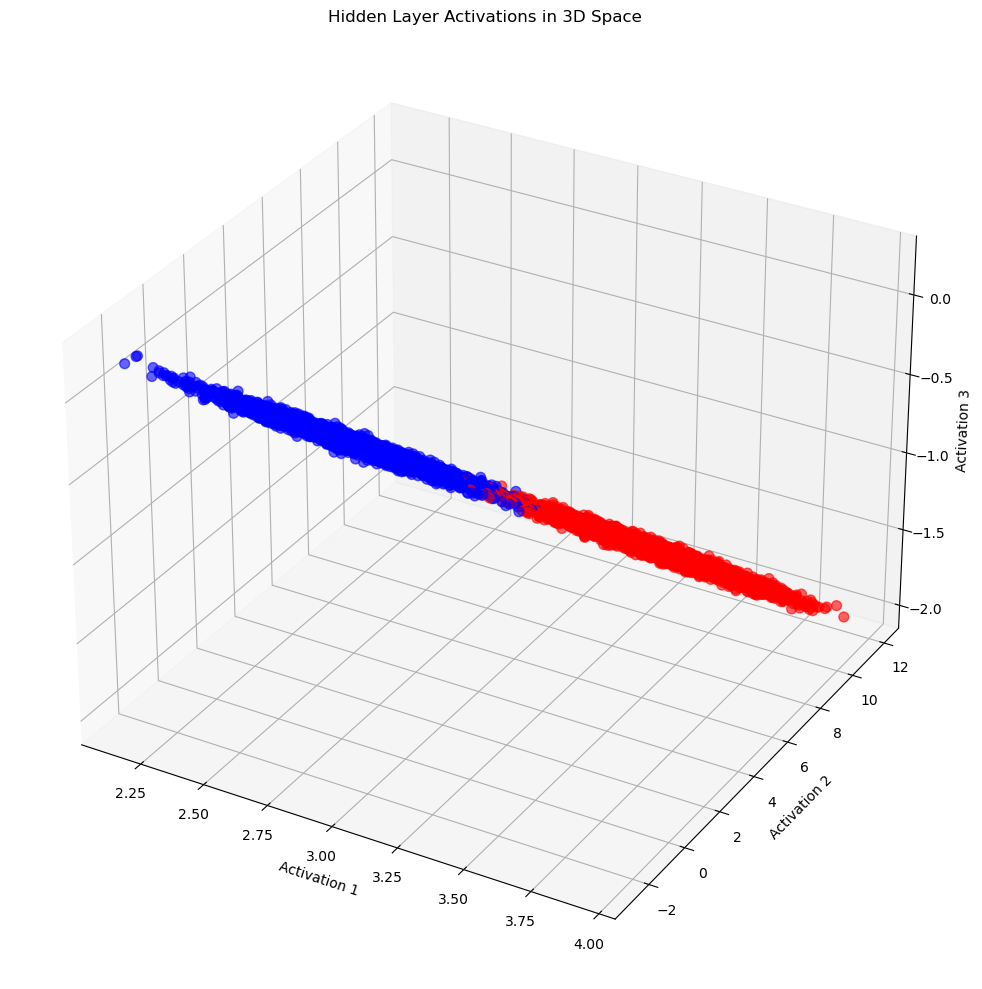


Performance comparison on linearly separable data:
Model                     | Accuracy       
------------------------------------------------------------
Logistic Regression       | 0.9830
Neural Network            | 0.9780


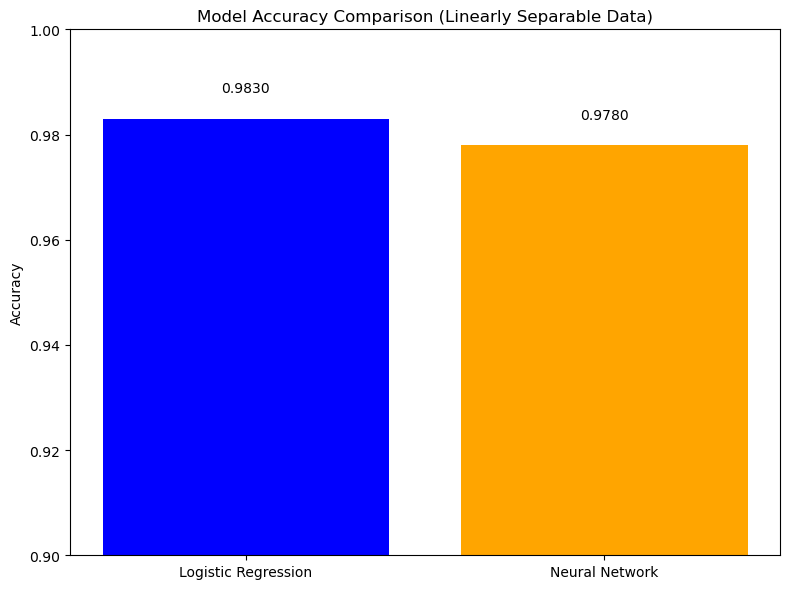

In [11]:
##################################################
#Classify the linearly separable data using linear classification models
##################################################

def sigmoid(z):
    """Sigmoid activation function"""
    return 1.0 / (1.0 + np.exp(-np.clip(z, -250, 250)))  # Clip to avoid overflow

def Logistic_Regression(X_train, y_train, X_test, learning_rate=0.01, num_iterations=7000):
    """
    Logistic Regression implementation using gradient descent
    
    Parameters:
    - X_train: Training features
    - y_train: Training labels
    - X_test: Test features
    - learning_rate: Learning rate for gradient descent
    - num_iterations: Number of iterations for training
    
    Returns:
    - w: Trained weights
    - b: Trained bias
    - y_pred: Predictions on test data
    """
    # Add bias term to features
    m, n = X_train.shape
    w = np.zeros(n)
    b = 0
    
    # Training using gradient descent
    for i in range(num_iterations):
        # Forward pass
        z = np.dot(X_train, w) + b
        a = sigmoid(z)
        
        # Compute gradients
        dw = (1/m) * np.dot(X_train.T, (a - y_train))
        db = (1/m) * np.sum(a - y_train)
        
        # Update parameters
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # Print loss every 100 iterations
        if i % 100 == 0:
            z = np.dot(X_train, w) + b
            a = sigmoid(z)
            loss = -np.mean(y_train * np.log(a + 1e-8) + (1 - y_train) * np.log(1 - a + 1e-8))
            print(f"Iteration {i}, Loss: {loss:.6f}")
    
    # Make predictions on test data
    z_test = np.dot(X_test, w) + b
    y_pred = sigmoid(z_test)
    y_pred_class = (y_pred > 0.5).astype(int)
    
    return w, b, y_pred_class

def plot_decision_boundary(X, y, w, b):
    """
    Plot the decision boundary for logistic regression
    """
    # Set min and max values with some margin
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Generate a grid of points
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    # Make predictions on the grid points
    Z = sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b)
    Z = Z.reshape(xx.shape)
    
    # Create a contour plot
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='RdBu')
    plt.contour(xx, yy, Z, levels=[0.5], linewidths=2, colors='k')
    
    # Plot the data points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu', edgecolors='k', s=50)
    plt.colorbar(scatter)
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Logistic Regression Decision Boundary')
    plt.grid(True)
    plt.show()

# Train logistic regression model on linearly separable data
print("Training logistic regression on linearly separable data...")
w_linear, b_linear, y_pred_linear = Logistic_Regression(tr_data, tr_targets, te_data)

# Compute accuracy
accuracy_linear = np.mean(y_pred_linear == te_targets)
print(f"Logistic Regression Accuracy on linearly separable data: {accuracy_linear:.4f}")

# Plot decision boundary
plot_decision_boundary(tr_data, tr_targets, w_linear, b_linear)

##################################################
#Classify the linearly separable data using deep neural based classification models
##################################################

def initialize_parameters_deep(layer_dims):
    """
    Initialize parameters for deep neural network
    
    Parameters:
    - layer_dims: Array containing the dimensions of each layer
    
    Returns:
    - parameters: Dictionary containing parameters "W1", "b1", ..., "WL", "bL"
    """
    np.random.seed(42)
    parameters = {}
    L = len(layer_dims)

    for l in range(1, L):
        # He initialization
        parameters[f'W{l}'] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2/layer_dims[l-1])
        parameters[f'b{l}'] = np.zeros((layer_dims[l], 1))
        
    return parameters

def forward_propagation(X, parameters):
    """
    Forward propagation for neural network
    
    Parameters:
    - X: Input data, shape (n_samples, n_features)
    - parameters: Dictionary containing parameters
    
    Returns:
    - AL: Output of the network
    - caches: List of caches for each layer
    - Z: Raw activation values for visualization
    """
    caches = []
    A = X.T  # Transpose X to match dimensions (input features, m_samples)
    L = len(parameters) // 2
    
    # Forward propagation for L-1 layers with ReLU
    for l in range(1, L):
        A_prev = A
        W = parameters[f'W{l}']
        b = parameters[f'b{l}']
        
        Z = np.dot(W, A_prev) + b
        A = np.maximum(0, Z)  # ReLU activation
        
        cache = (A_prev, W, b, Z)
        caches.append(cache)
    
    # Output layer with sigmoid activation
    W = parameters[f'W{L}']
    b = parameters[f'b{L}']
    Z = np.dot(W, A) + b
    A = sigmoid(Z)
    
    cache = (A, W, b, Z)
    caches.append(cache)
    
    return A, caches, Z

def compute_cost(AL, Y):
    """
    Compute binary cross-entropy cost
    
    Parameters:
    - AL: Output of the network, shape (1, m_samples)
    - Y: True labels, shape (1, m_samples)
    
    Returns:
    - cost: Cross-entropy cost
    """
    m = Y.shape[1]  # Number of samples (in the transposed format)
    cost = -np.mean(Y * np.log(AL + 1e-8) + (1 - Y) * np.log(1 - AL + 1e-8))
    return cost

def backward_propagation(AL, Y, caches, parameters):
    """
    Backward propagation for neural network
    
    Parameters:
    - AL: Output of the network
    - Y: True labels
    - caches: List of caches from forward propagation
    - parameters: Dictionary containing parameters
    
    Returns:
    - grads: Dictionary containing gradients
    """
    grads = {}
    L = len(caches)
    m = Y.shape[1]  # Number of samples
    
    # Gradient of the output layer
    dAL = -(np.divide(Y, AL + 1e-8) - np.divide(1 - Y, 1 - AL + 1e-8))
    
    current_cache = caches[L-1]
    A_prev, W, b, Z = current_cache
    
    # For sigmoid output layer
    dZ = AL - Y
    dW = np.dot(dZ, A_prev.T) / m
    db = np.sum(dZ, axis=1, keepdims=True) / m
    dA_prev = np.dot(W.T, dZ)
    
    grads[f"dW{L}"] = dW
    grads[f"db{L}"] = db
    
    # Propagate through hidden layers
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        A_prev, W, b, Z = current_cache
        
        dZ = dA_prev * (Z > 0)  # ReLU gradient
        dW = np.dot(dZ, A_prev.T) / m
        db = np.sum(dZ, axis=1, keepdims=True) / m
        dA_prev = np.dot(W.T, dZ)
        
        grads[f"dW{l+1}"] = dW
        grads[f"db{l+1}"] = db
    
    return grads

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Parameters:
    - parameters: Dictionary containing parameters
    - grads: Dictionary containing gradients
    - learning_rate: Learning rate
    
    Returns:
    - parameters: Updated parameters
    """
    L = len(parameters) // 2
    
    for l in range(L):
        parameters[f"W{l+1}"] = parameters[f"W{l+1}"] - learning_rate * grads[f"dW{l+1}"]
        parameters[f"b{l+1}"] = parameters[f"b{l+1}"] - learning_rate * grads[f"db{l+1}"]
    
    return parameters

def neural_network_model(X_train, Y_train, X_test, Y_test, layer_dims, learning_rate=0.01, num_iterations=2000, print_cost=True):
    """
    Neural network model for binary classification
    
    Parameters:
    - X_train: Training features
    - Y_train: Training labels
    - X_test: Test features
    - Y_test: Test labels
    - layer_dims: Array containing the dimensions of each layer
    - learning_rate: Learning rate for gradient descent
    - num_iterations: Number of iterations for training
    - print_cost: Whether to print cost during training
    
    Returns:
    - parameters: Learned parameters
    - costs: List of costs during training
    - predictions: Predictions on test data
    - activations: Hidden layer activations for visualization
    """
    np.random.seed(42)
    costs = []
    
    # Initialize parameters
    parameters = initialize_parameters_deep(layer_dims)
    
    # Convert Y to appropriate shape (1, m)
    Y_train_reshaped = Y_train.reshape(1, -1)
    
    # Training loop
    for i in range(num_iterations):
        # Forward propagation
        AL, caches, Z = forward_propagation(X_train, parameters)
        
        # Compute cost
        cost = compute_cost(AL, Y_train_reshaped)
        
        # Backward propagation
        grads = backward_propagation(AL, Y_train_reshaped, caches, parameters)
        
        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print cost
        if print_cost and i % 200 == 0:
            print(f"Cost after iteration {i}: {cost:.6f}")
            costs.append(cost)
    
    # Plot the cost curve
    plt.figure(figsize=(10, 6))
    plt.plot(np.squeeze(costs))
    plt.xlabel('iterations (per 200)')
    plt.ylabel('cost')
    plt.title('Learning curve')
    plt.show()
    
    # Make predictions on test data
    Y_test_reshaped = Y_test.reshape(1, -1)
    
    AL_test, _, activations = forward_propagation(X_test, parameters)
    predictions = (AL_test > 0.5).astype(int)
    accuracy = np.mean(predictions == Y_test_reshaped)
    
    print(f"Accuracy on test data: {accuracy:.4f}")
    
    return parameters, costs, predictions, activations

def plot_decision_boundary_nn(X, y, parameters):
    """
    Plot decision boundary for neural network
    """
    # Set min and max values with some margin
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Generate a grid of points
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    # Make predictions on grid points
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    predictions, _, _ = forward_propagation(grid_points, parameters)
    predictions = predictions.reshape(xx.shape)
    
    # Create contour plot
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, predictions, alpha=0.4, cmap='RdBu')
    plt.contour(xx, yy, predictions, levels=[0.5], linewidths=2, colors='k')
    
    # Plot data points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu', edgecolors='k', s=50)
    plt.colorbar(scatter)
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Neural Network Decision Boundary')
    plt.grid(True)
    plt.show()

def plot_hidden_activations(X, parameters):
    """
    Plot the hidden layer activations in 3D space
    """
    # Forward pass to get activations
    _, caches, _ = forward_propagation(X, parameters)
    
    # Extract first hidden layer activations
    first_layer_cache = caches[0]
    Z = first_layer_cache[3]  # Z values from the cache
    
    # For visualization, use first 3 neurons
    if Z.shape[0] > 3:
        Z = Z[:3, :]
    
    # Create 3D plot
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Color points by class
    colors = np.array(['blue', 'red'])
    y_reshaped = tr_targets.astype(int)
    
    # Plot points
    ax.scatter(Z[0, :], Z[1, :], Z[2, :], c=colors[y_reshaped], s=50, alpha=0.6)
    
    ax.set_xlabel('Activation 1')
    ax.set_ylabel('Activation 2')
    ax.set_zlabel('Activation 3')
    ax.set_title('Hidden Layer Activations in 3D Space')
    
    plt.tight_layout()
    plt.show()

# Set up layer dimensions for neural network: [input size, first hidden layer, second hidden layer, output size]
layer_dims_linear = [2, 3, 3, 1]  # 2 features, 3 nodes in each hidden layer, 1 output

# Train neural network model on linearly separable data
print("\nTraining neural network on linearly separable data...")
parameters_linear, costs_linear, predictions_linear, _ = neural_network_model(
    tr_data, tr_targets, te_data, te_targets, 
    layer_dims_linear, learning_rate=0.01, num_iterations=7000
)

# Plot decision boundary
plot_decision_boundary_nn(tr_data, tr_targets, parameters_linear)

# Plot hidden layer activations
plot_hidden_activations(tr_data, parameters_linear)

##################################################
#Compare the performance of both the models on linearly separable data
##################################################

# Calculate and compare accuracies
nn_accuracy_linear = np.mean(predictions_linear.flatten() == te_targets)

print("\nPerformance comparison on linearly separable data:")
print("="*60)
print(f"{'Model':<25} | {'Accuracy':<15}")
print("-"*60)
print(f"{'Logistic Regression':<25} | {accuracy_linear:.4f}")
print(f"{'Neural Network':<25} | {nn_accuracy_linear:.4f}")
print("="*60)

# Visualize comparison
plt.figure(figsize=(8, 6))
models = ['Logistic Regression', 'Neural Network']
accuracies = [accuracy_linear, nn_accuracy_linear]
plt.bar(models, accuracies, color=['blue', 'orange'])
plt.ylim(0.9, 1.0)  # Set y-axis to start at 0.9 for better visualization
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison (Linearly Separable Data)')
for i, v in enumerate(accuracies):
    plt.text(i, v+0.005, f"{v:.4f}", ha='center')
plt.tight_layout()
plt.show()

Training logistic regression on non-linearly separable data...
Iteration 0, Loss: 0.693146
Iteration 100, Loss: 0.693125
Iteration 200, Loss: 0.693123
Iteration 300, Loss: 0.693122
Iteration 400, Loss: 0.693122
Iteration 500, Loss: 0.693121
Iteration 600, Loss: 0.693121
Iteration 700, Loss: 0.693121
Iteration 800, Loss: 0.693121
Iteration 900, Loss: 0.693121
Logistic Regression Accuracy on non-linearly separable data: 0.6475


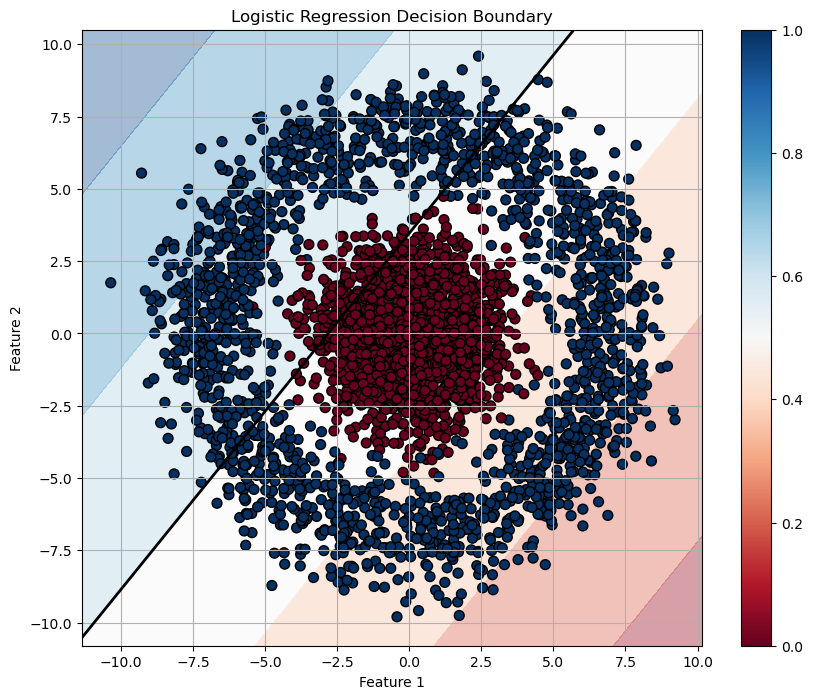


Training neural network on non-linearly separable data...
Cost after iteration 0: 1.674886
Cost after iteration 200: 0.431284
Cost after iteration 400: 0.326229
Cost after iteration 600: 0.262467
Cost after iteration 800: 0.219387
Cost after iteration 1000: 0.185203
Cost after iteration 1200: 0.133588
Cost after iteration 1400: 0.103590
Cost after iteration 1600: 0.093716
Cost after iteration 1800: 0.086330
Cost after iteration 2000: 0.080445
Cost after iteration 2200: 0.075610
Cost after iteration 2400: 0.071568
Cost after iteration 2600: 0.068122
Cost after iteration 2800: 0.065142


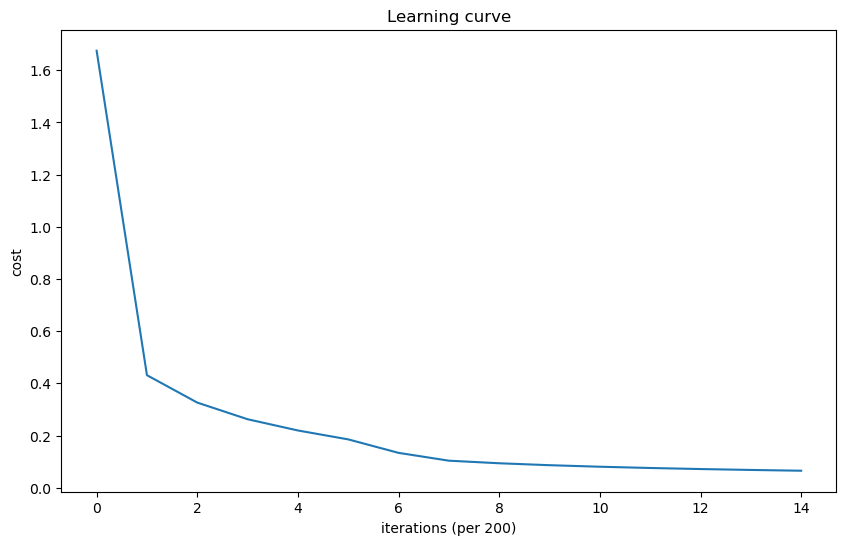

Accuracy on test data: 0.9950


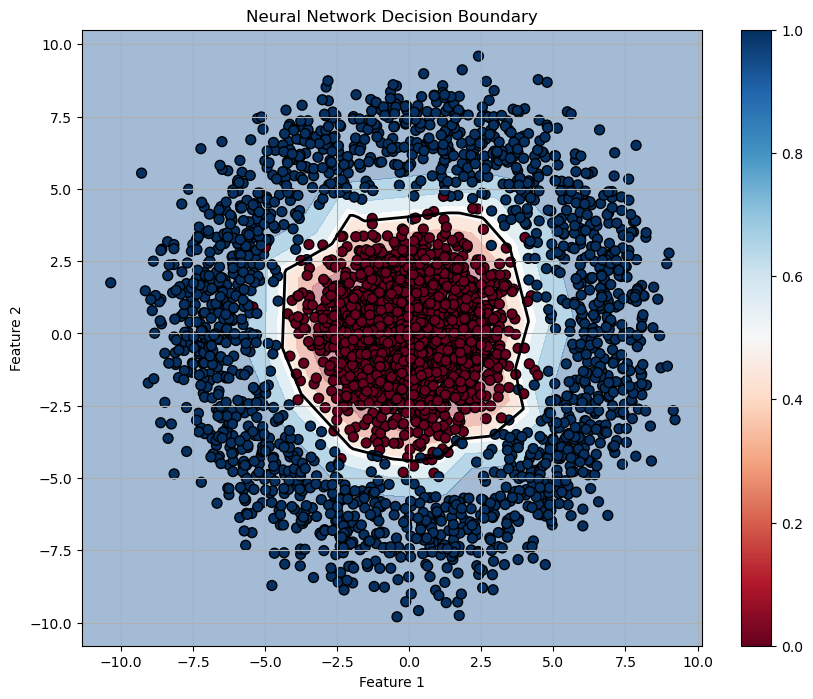

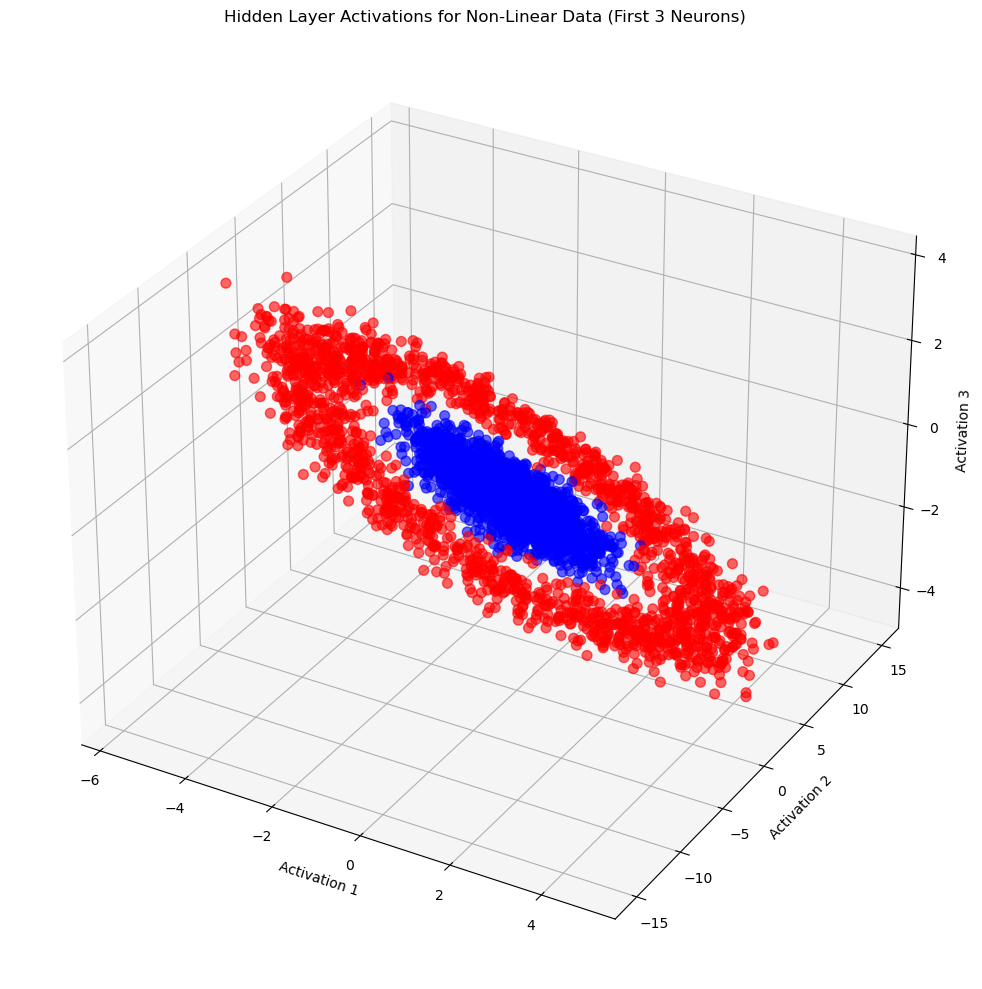


Performance comparison on non-linearly separable data:
Model                     | Accuracy       
------------------------------------------------------------
Logistic Regression       | 0.6475
Neural Network            | 0.9950


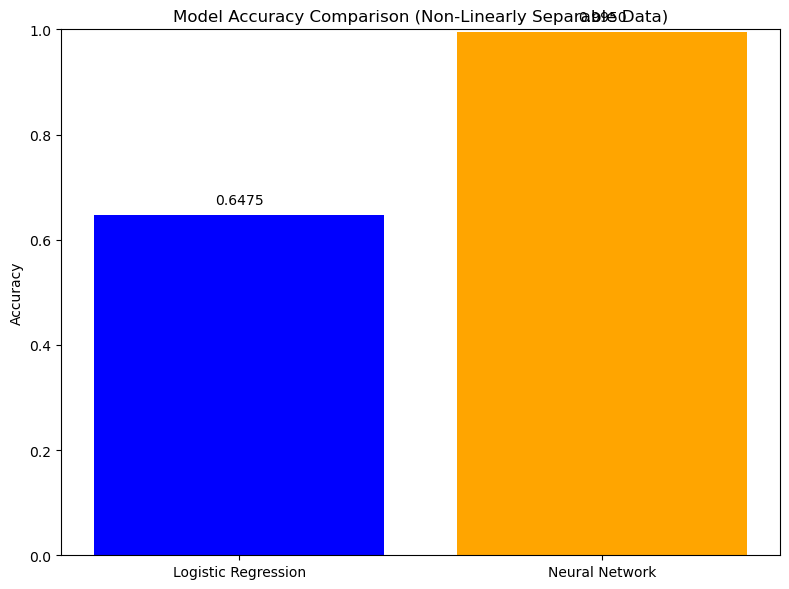

In [10]:
##################################################
#Classify the non-linearly separable data using linear classification models
##################################################

# Combine class1_data and class2_data
nonlinear_data = np.vstack((class1_data, class2_data))
nonlinear_targets = np.concatenate([np.zeros(len(class1_data)), np.ones(len(class2_data))])

# Split data into train and test sets
np.random.seed(42)
indices = np.random.permutation(len(nonlinear_data))
train_size = int(0.9 * len(nonlinear_data))
train_idx, test_idx = indices[:train_size], indices[train_size:]

nl_X_train = nonlinear_data[train_idx]
nl_y_train = nonlinear_targets[train_idx]
nl_X_test = nonlinear_data[test_idx]
nl_y_test = nonlinear_targets[test_idx]

# Train logistic regression on non-linearly separable data
print("Training logistic regression on non-linearly separable data...")
w_nonlinear, b_nonlinear, y_pred_nonlinear = Logistic_Regression(
    nl_X_train, nl_y_train, nl_X_test, learning_rate=0.01, num_iterations=1000
)

# Compute accuracy
accuracy_nonlinear_lr = np.mean(y_pred_nonlinear == nl_y_test)
print(f"Logistic Regression Accuracy on non-linearly separable data: {accuracy_nonlinear_lr:.4f}")

# Plot decision boundary
plot_decision_boundary(nl_X_train, nl_y_train, w_nonlinear, b_nonlinear)

##################################################
#Classify the non-linearly separable data using deep neural based classification models
##################################################

# Set up layer dimensions for neural network (using more nodes for non-linear data)
layer_dims_nonlinear = [2, 10, 5, 1]  # 2 features, wider hidden layers, 1 output

# Train neural network model on non-linearly separable data
print("\nTraining neural network on non-linearly separable data...")
parameters_nonlinear, costs_nonlinear, predictions_nonlinear, activations_nonlinear = neural_network_model(
    nl_X_train, nl_y_train, nl_X_test, nl_y_test, 
    layer_dims_nonlinear, learning_rate=0.01, num_iterations=3000
)

# Plot decision boundary
plot_decision_boundary_nn(nl_X_train, nl_y_train, parameters_nonlinear)

# Plot hidden layer activations for non-linear data
# Get activations from first hidden layer
_, caches, _ = forward_propagation(nl_X_train, parameters_nonlinear)
Z1 = caches[0][3]  # Z values from first hidden layer

# Use first 3 neurons for visualization
if Z1.shape[0] > 3:
    Z1 = Z1[:3, :]

# Create 3D plot
plt.figure(figsize=(12, 10))
ax = plt.axes(projection='3d')

# Color points by class
colors = np.array(['blue', 'red'])
y_reshaped = nl_y_train.astype(int)

# Plot points
ax.scatter3D(Z1[0, :], Z1[1, :], Z1[2, :], c=colors[y_reshaped], s=50, alpha=0.6)
ax.set_xlabel('Activation 1')
ax.set_ylabel('Activation 2')
ax.set_zlabel('Activation 3')
ax.set_title('Hidden Layer Activations for Non-Linear Data (First 3 Neurons)')
plt.tight_layout()
plt.show()

##################################################
#Compare the performance of both the models on non-linearly separable data
##################################################

# Calculate accuracy for neural network
nn_accuracy_nonlinear = np.mean(predictions_nonlinear.flatten() == nl_y_test)

print("\nPerformance comparison on non-linearly separable data:")
print("="*60)
print(f"{'Model':<25} | {'Accuracy':<15}")
print("-"*60)
print(f"{'Logistic Regression':<25} | {accuracy_nonlinear_lr:.4f}")
print(f"{'Neural Network':<25} | {nn_accuracy_nonlinear:.4f}")
print("="*60)

# Visualize comparison
plt.figure(figsize=(8, 6))
models = ['Logistic Regression', 'Neural Network']
accuracies = [accuracy_nonlinear_lr, nn_accuracy_nonlinear]
plt.bar(models, accuracies, color=['blue', 'orange'])
plt.ylim([0, 1.0])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison (Non-Linearly Separable Data)')
for i, v in enumerate(accuracies):
    plt.text(i, v+0.02, f"{v:.4f}", ha='center')
plt.tight_layout()
plt.show()

<b> Report your observations </b>

1. Neural Network is universal estimator, it also estimates non linearly separable data.

2. Logistiuc regression works pretty well for linearly separable data as expected.

3. if the data is linearly separable, logistic works quickly and works pretty well.

